In [1]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC                            # Support vector machine model
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

# Data Collection

In [4]:
df = pd.read_csv("kidney.csv")

In [5]:
df.head()

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80.0,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,15.4,7800,5.2,1,1,0,1,0,0,1
1,7,50.0,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,11.3,6000,4.8,0,0,0,1,0,0,1
2,62,80.0,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,9.6,7500,4.8,0,1,0,0,0,1,1
3,48,70.0,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,11.2,6700,3.9,1,0,0,0,1,1,1
4,51,80.0,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,11.6,7300,4.6,0,0,0,1,0,0,1


In [6]:
df.tail()

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55,80.0,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,15.7,6700,4.9,0,0,0,1,0,0,0
396,42,70.0,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,16.5,7800,6.2,0,0,0,1,0,0,0
397,12,80.0,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,15.8,6600,5.4,0,0,0,1,0,0,0
398,17,60.0,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,14.2,7200,5.9,0,0,0,1,0,0,0
399,58,80.0,0.0,0.0,1,1,0,0,131.0,18.0,1.1,141.0,15.8,6800,6.1,0,0,0,1,0,0,0


<Axes: xlabel='classification', ylabel='count'>

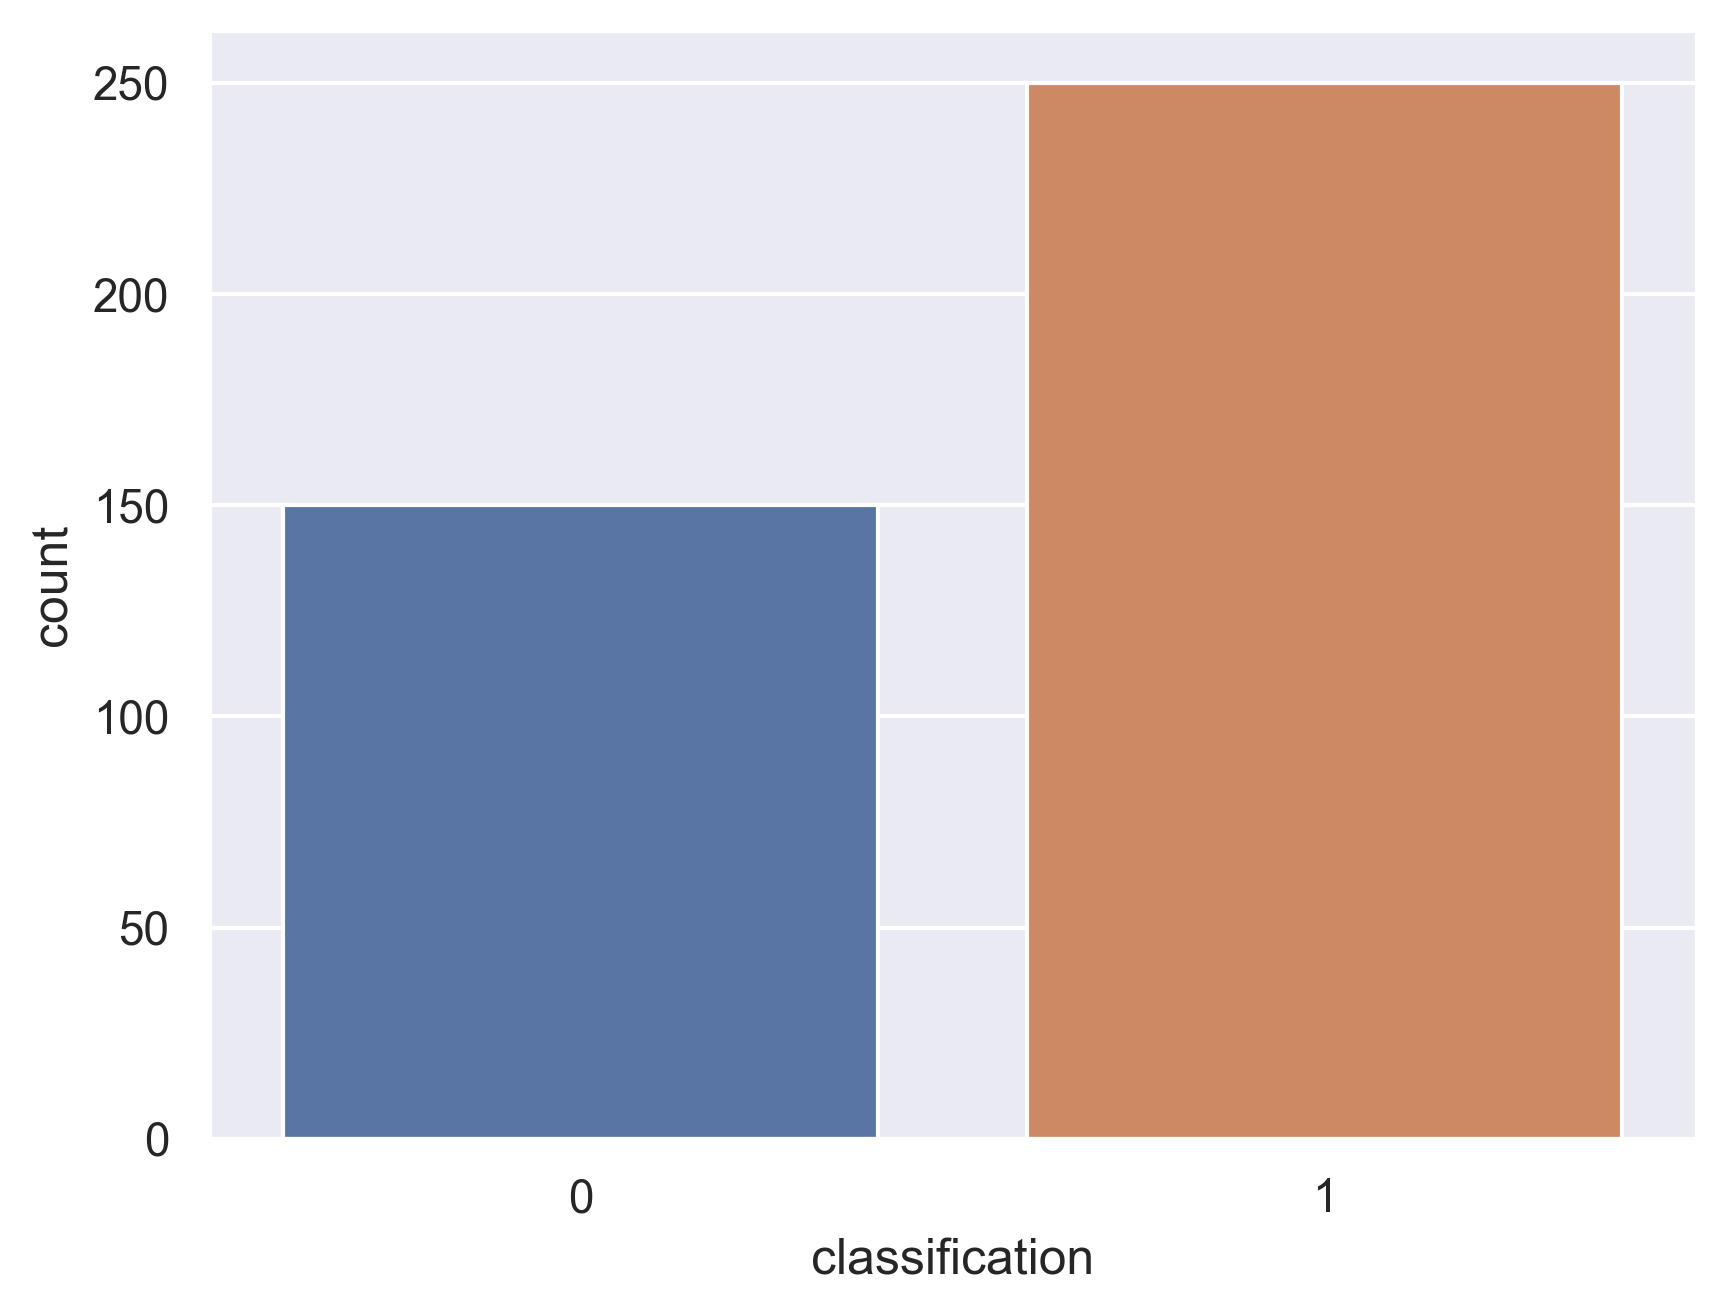

In [8]:
sns.countplot(x = "classification", data = df)

In [9]:
X = df.drop("classification", axis=1)
y = df["classification"]
display(X)
display(y)

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48,80.0,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,15.4,7800,5.2,1,1,0,1,0,0
1,7,50.0,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,11.3,6000,4.8,0,0,0,1,0,0
2,62,80.0,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,9.6,7500,4.8,0,1,0,0,0,1
3,48,70.0,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,11.2,6700,3.9,1,0,0,0,1,1
4,51,80.0,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,11.6,7300,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,15.7,6700,4.9,0,0,0,1,0,0
396,42,70.0,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,16.5,7800,6.2,0,0,0,1,0,0
397,12,80.0,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,15.8,6600,5.4,0,0,0,1,0,0
398,17,60.0,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,14.2,7200,5.9,0,0,0,1,0,0


0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [11]:
scaler = StandardScaler()
features = scaler.fit_transform(X)
features

array([[-0.21003135,  0.25421378,  0.07624929, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62723421, -1.97247624,  2.36372784, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.615355  ,  0.25421378,  0.83874214, ..., -1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33245337,  0.25421378, -0.68624357, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03767254, -1.23024623, -0.68624357, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37953033,  0.25421378, -0.68624357, ...,  0.50780078,
        -0.4843221 , -0.42008403]])

## Splitting the data into train and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42) 

## Balancing Data

In [13]:
len(y_train[y_train==1]), len(y_train[y_train==0]), y_train.shape

(174, 106, (280,))

### Under Sampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_train_down,y_train_down = rus.fit_resample(X_train, y_train)

print(len(y_train_down[y_train_down==0]), len(y_train_down[y_train_down==1]))
print(len(X_train_down))

106 106
212


### Over Sampling

In [15]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(X_train, y_train)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

174 174
348


# Model Building

## Logistic Regression

In [16]:
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

In [17]:
lr_grid_search(X_train, y_train)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

### Over sample Logistic

In [18]:
lr = LogisticRegression(C=1, penalty='l2', solver='newton-cg')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train,y_train)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

0.985632183908046
0.9833333333333333


- **Accuracy** = Proportion of correct prediction over total prediction
- **Recall** = Out of actual positive(True positive + False negative), how many are True positive
- **Precision** = Out of predicted positive (true positive + False positive), how many are True positive

In [19]:
lr_tacc = lr.score(X_test,y_test)
lr_train_acc = lr.score(X_train, y_train)

#### Confusion matrix of Logistic Regression Model

<Axes: >

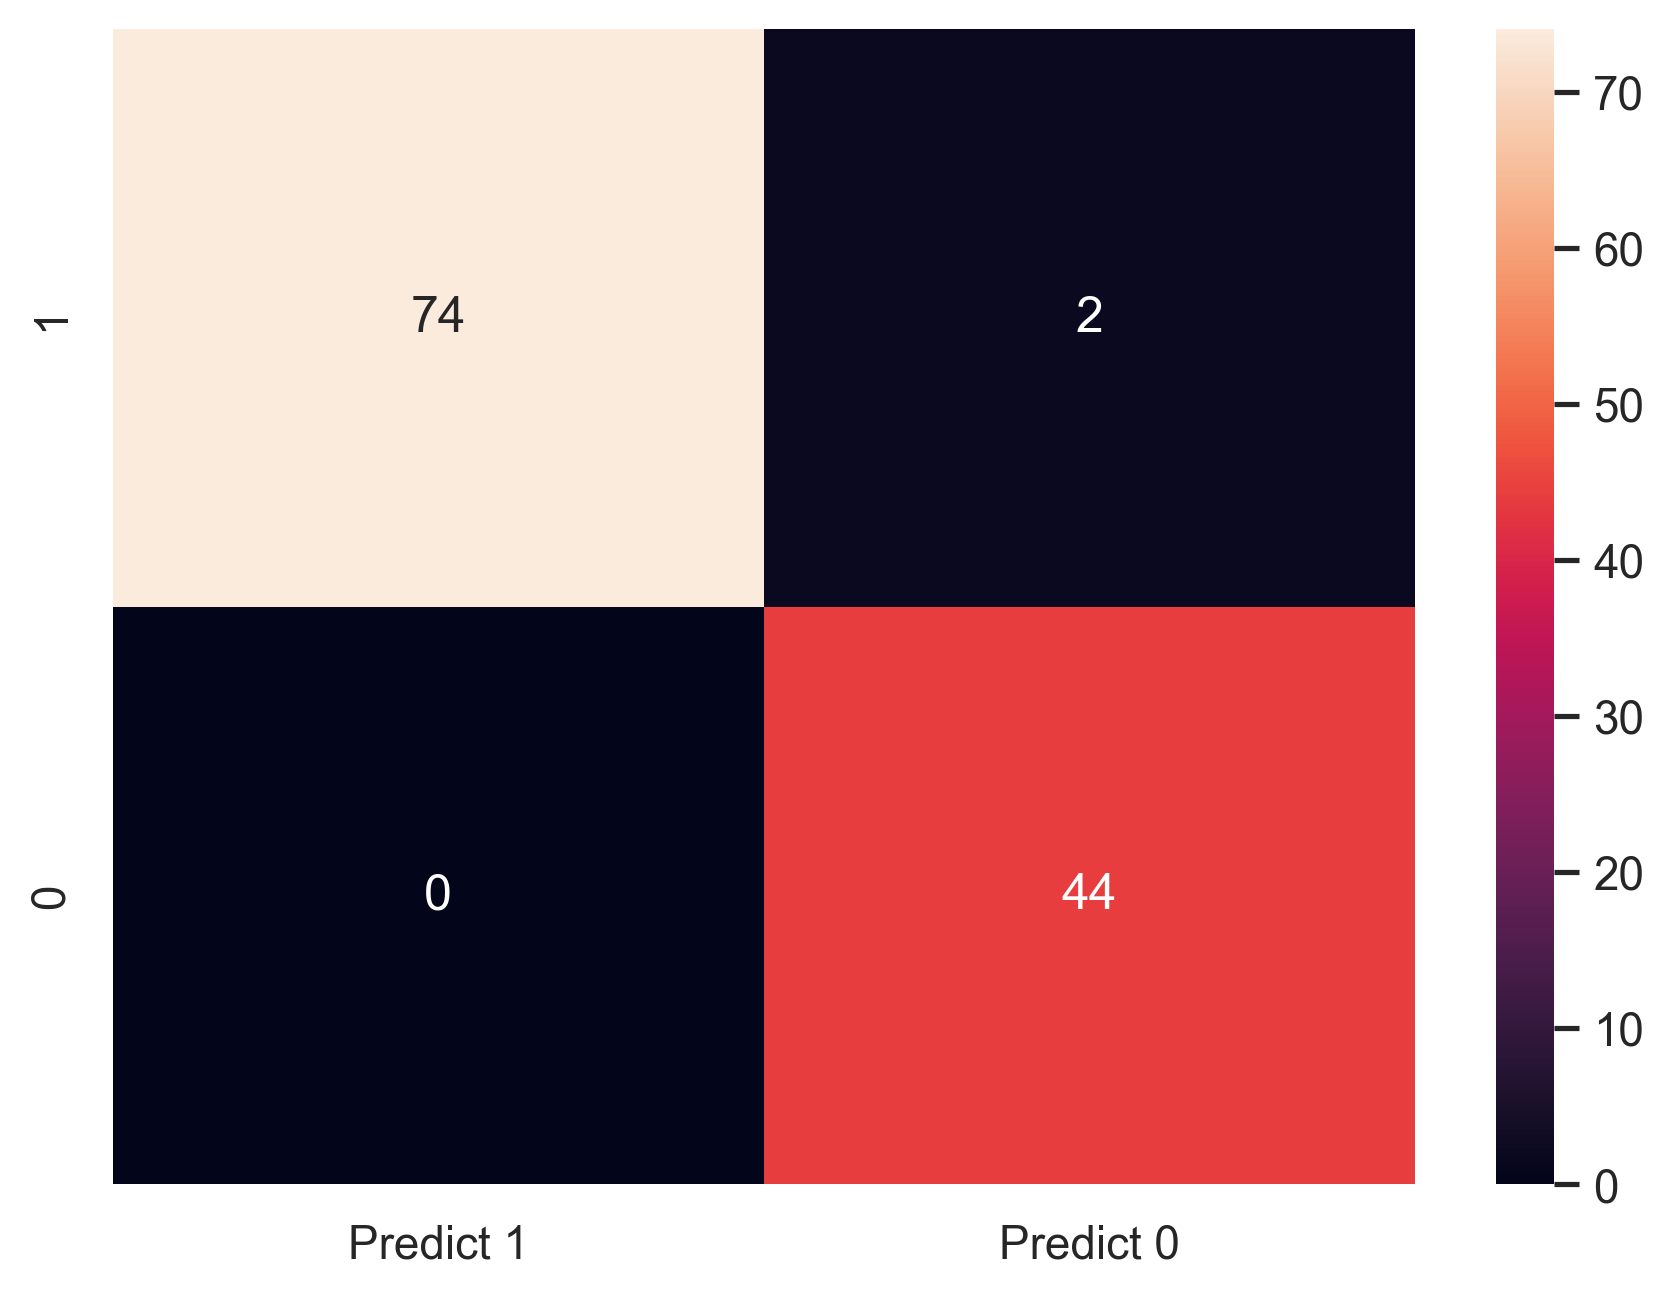

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of Logistic Regression Model

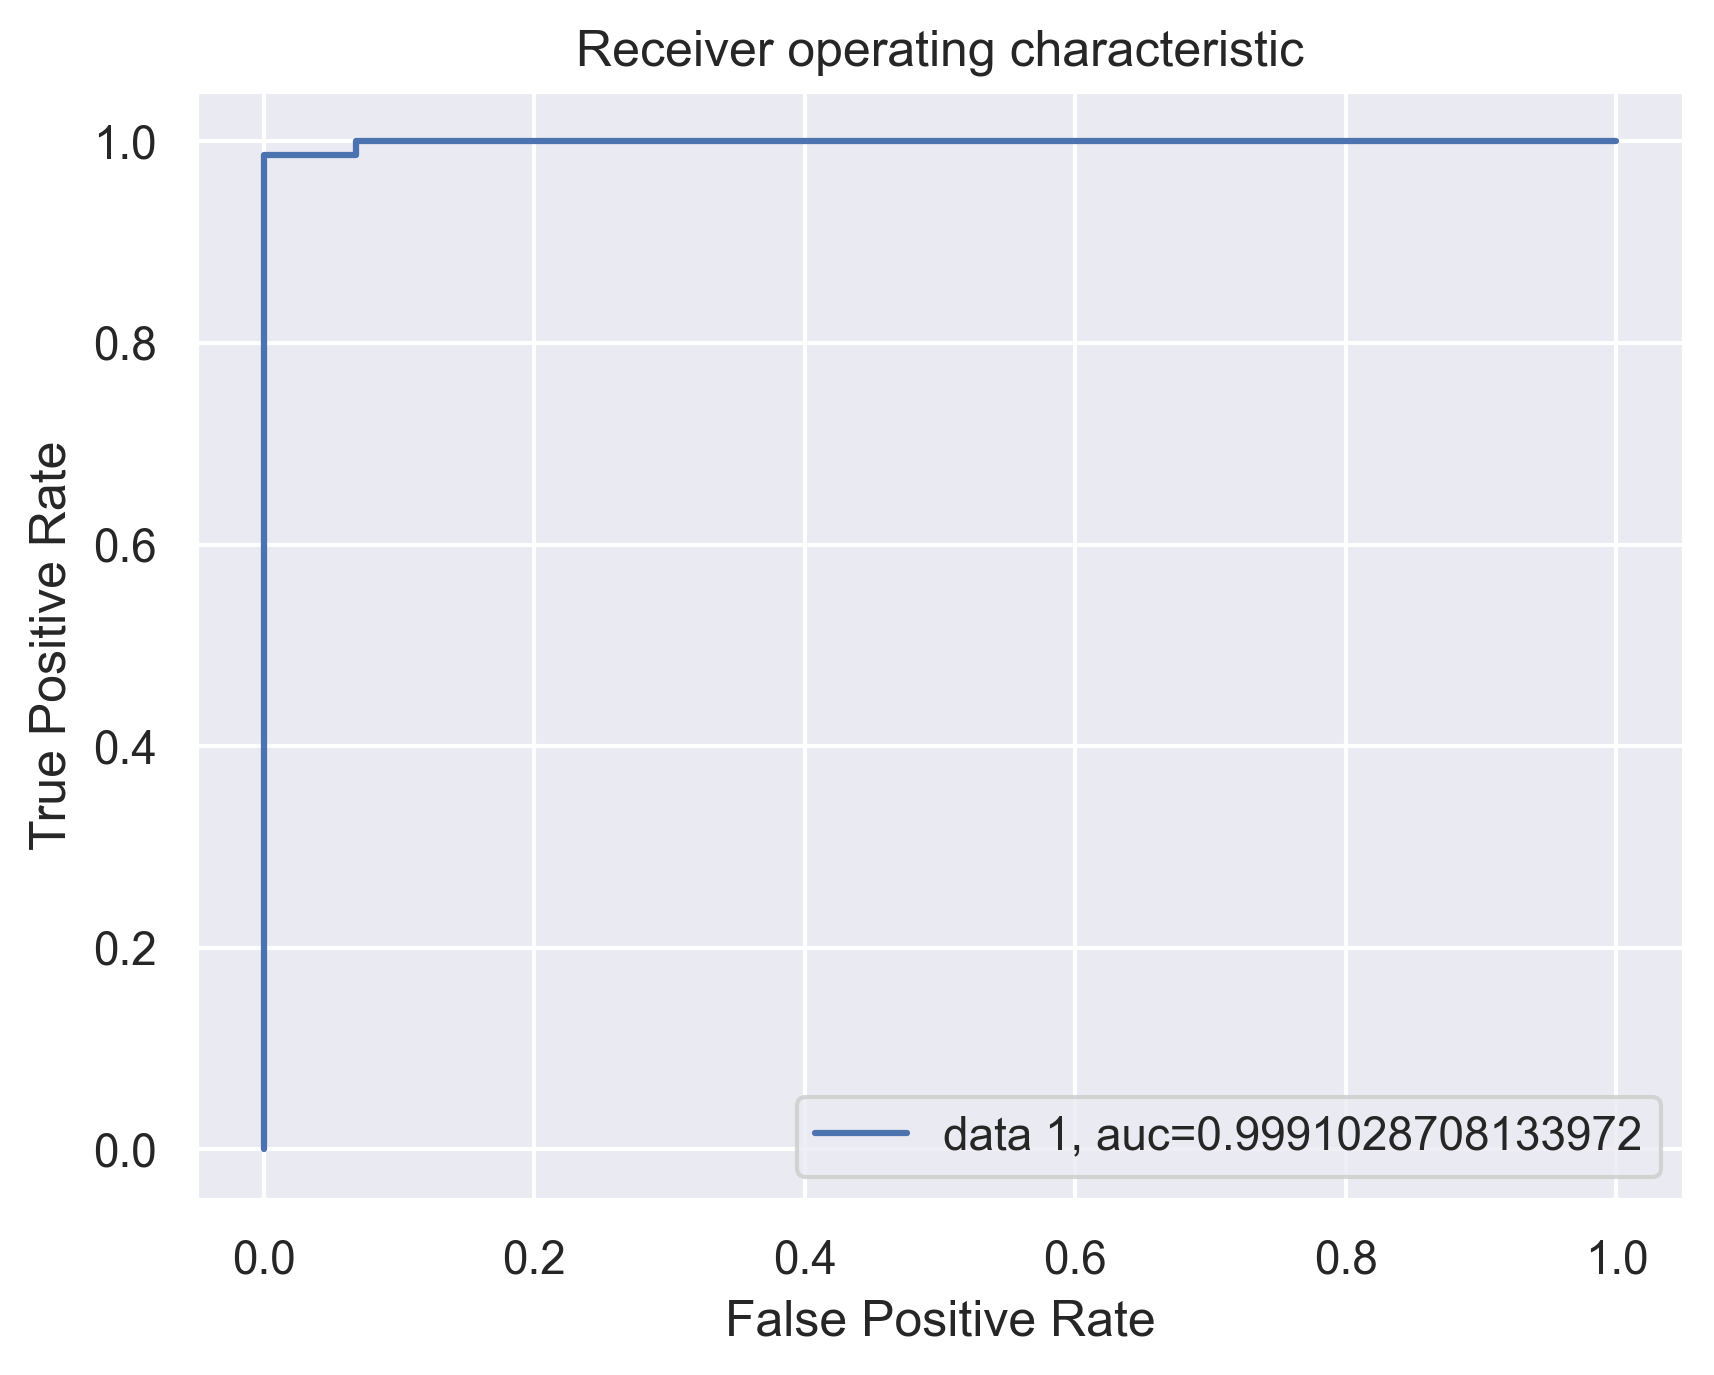

In [21]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [22]:
lr_auc = auc
lr_auc

0.9991028708133972

# Under Sample Logistic

In [23]:
lr_grid_search(X_train_down, y_train_down)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [24]:
lr = LogisticRegression(C=10, penalty='l2', solver='newton-cg')
lr.fit(X_train_down,y_train_down)

y_pred_lr = lr.predict(X_test)

print(metrics.classification_report(y_test, y_pred_lr))

lr_score = lr.score(X_train_down,y_train_down)
print(lr_score)

lr_score = lr.score(X_test,y_test)
print(lr_score)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.96      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

1.0
0.975


<Axes: >

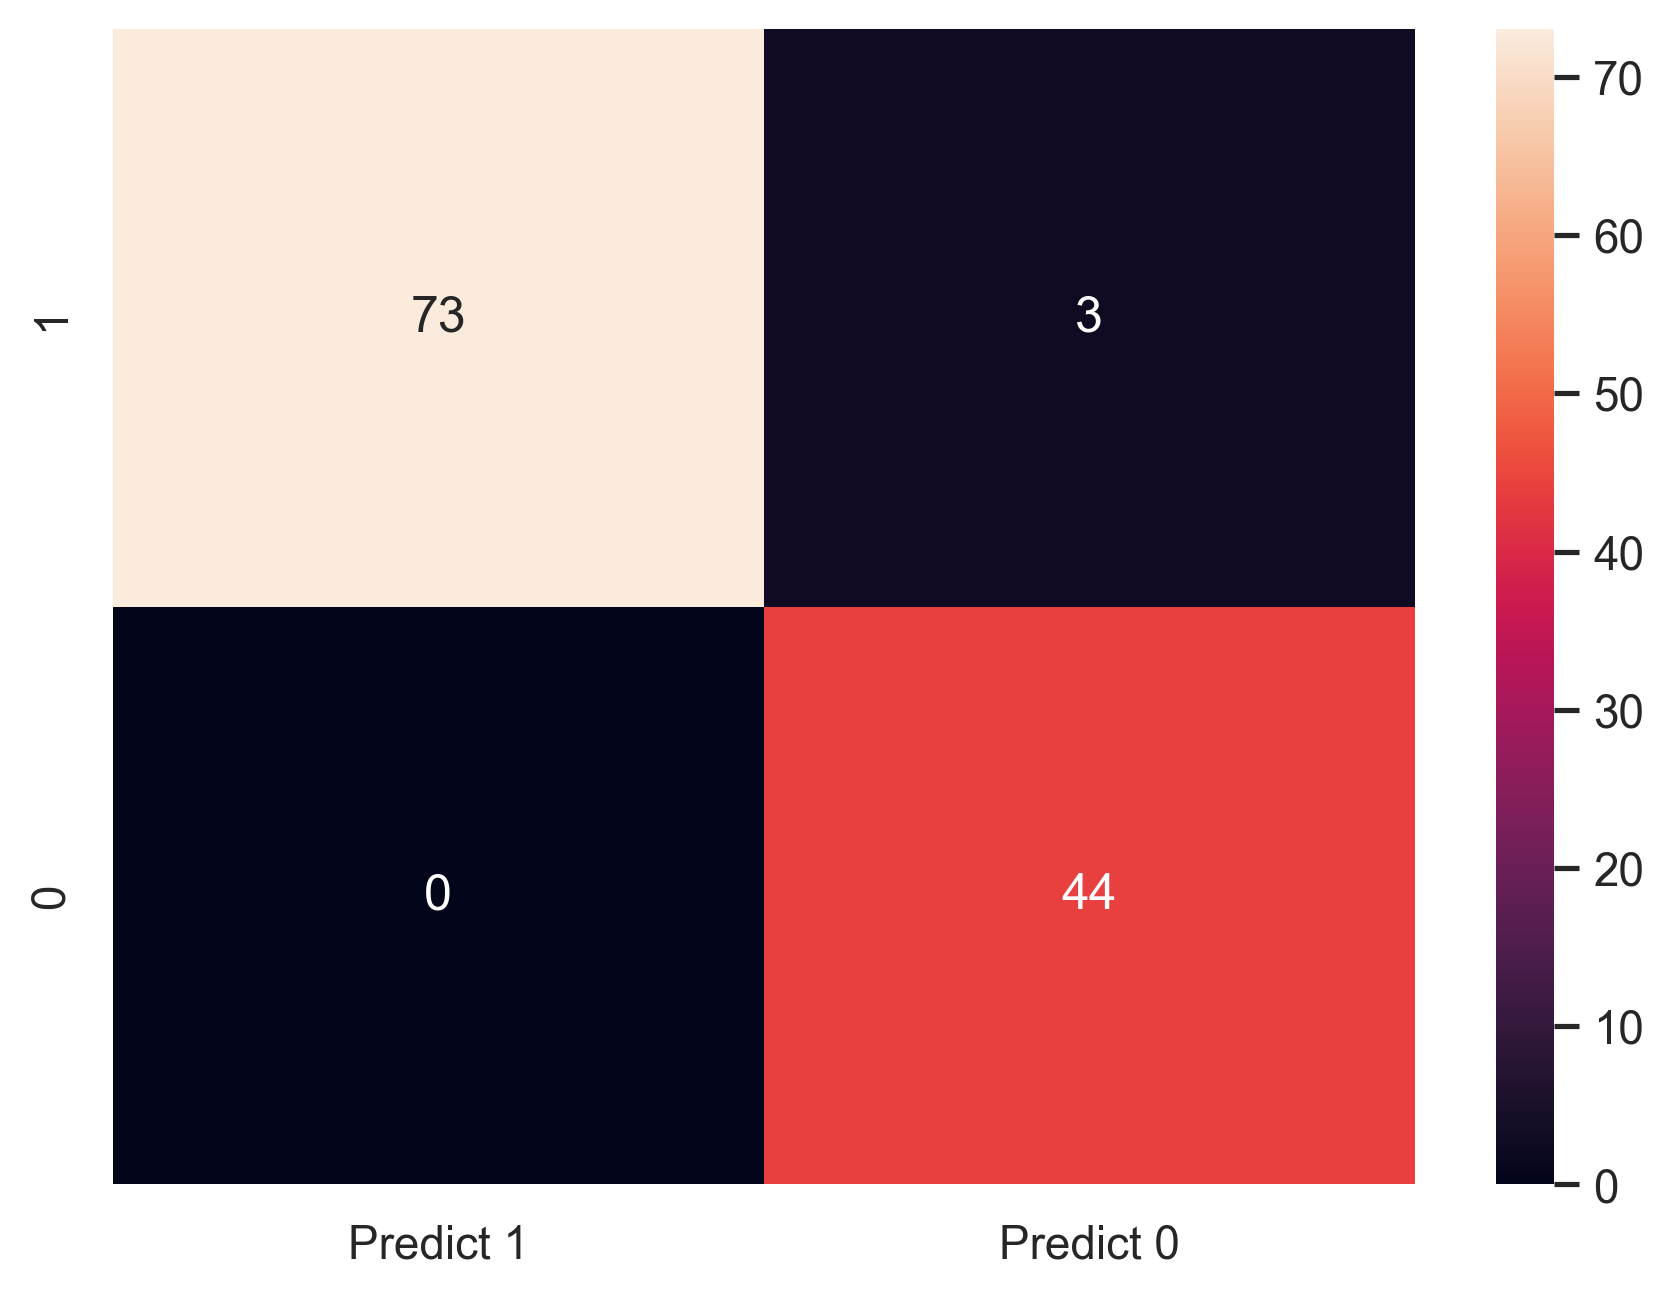

In [25]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

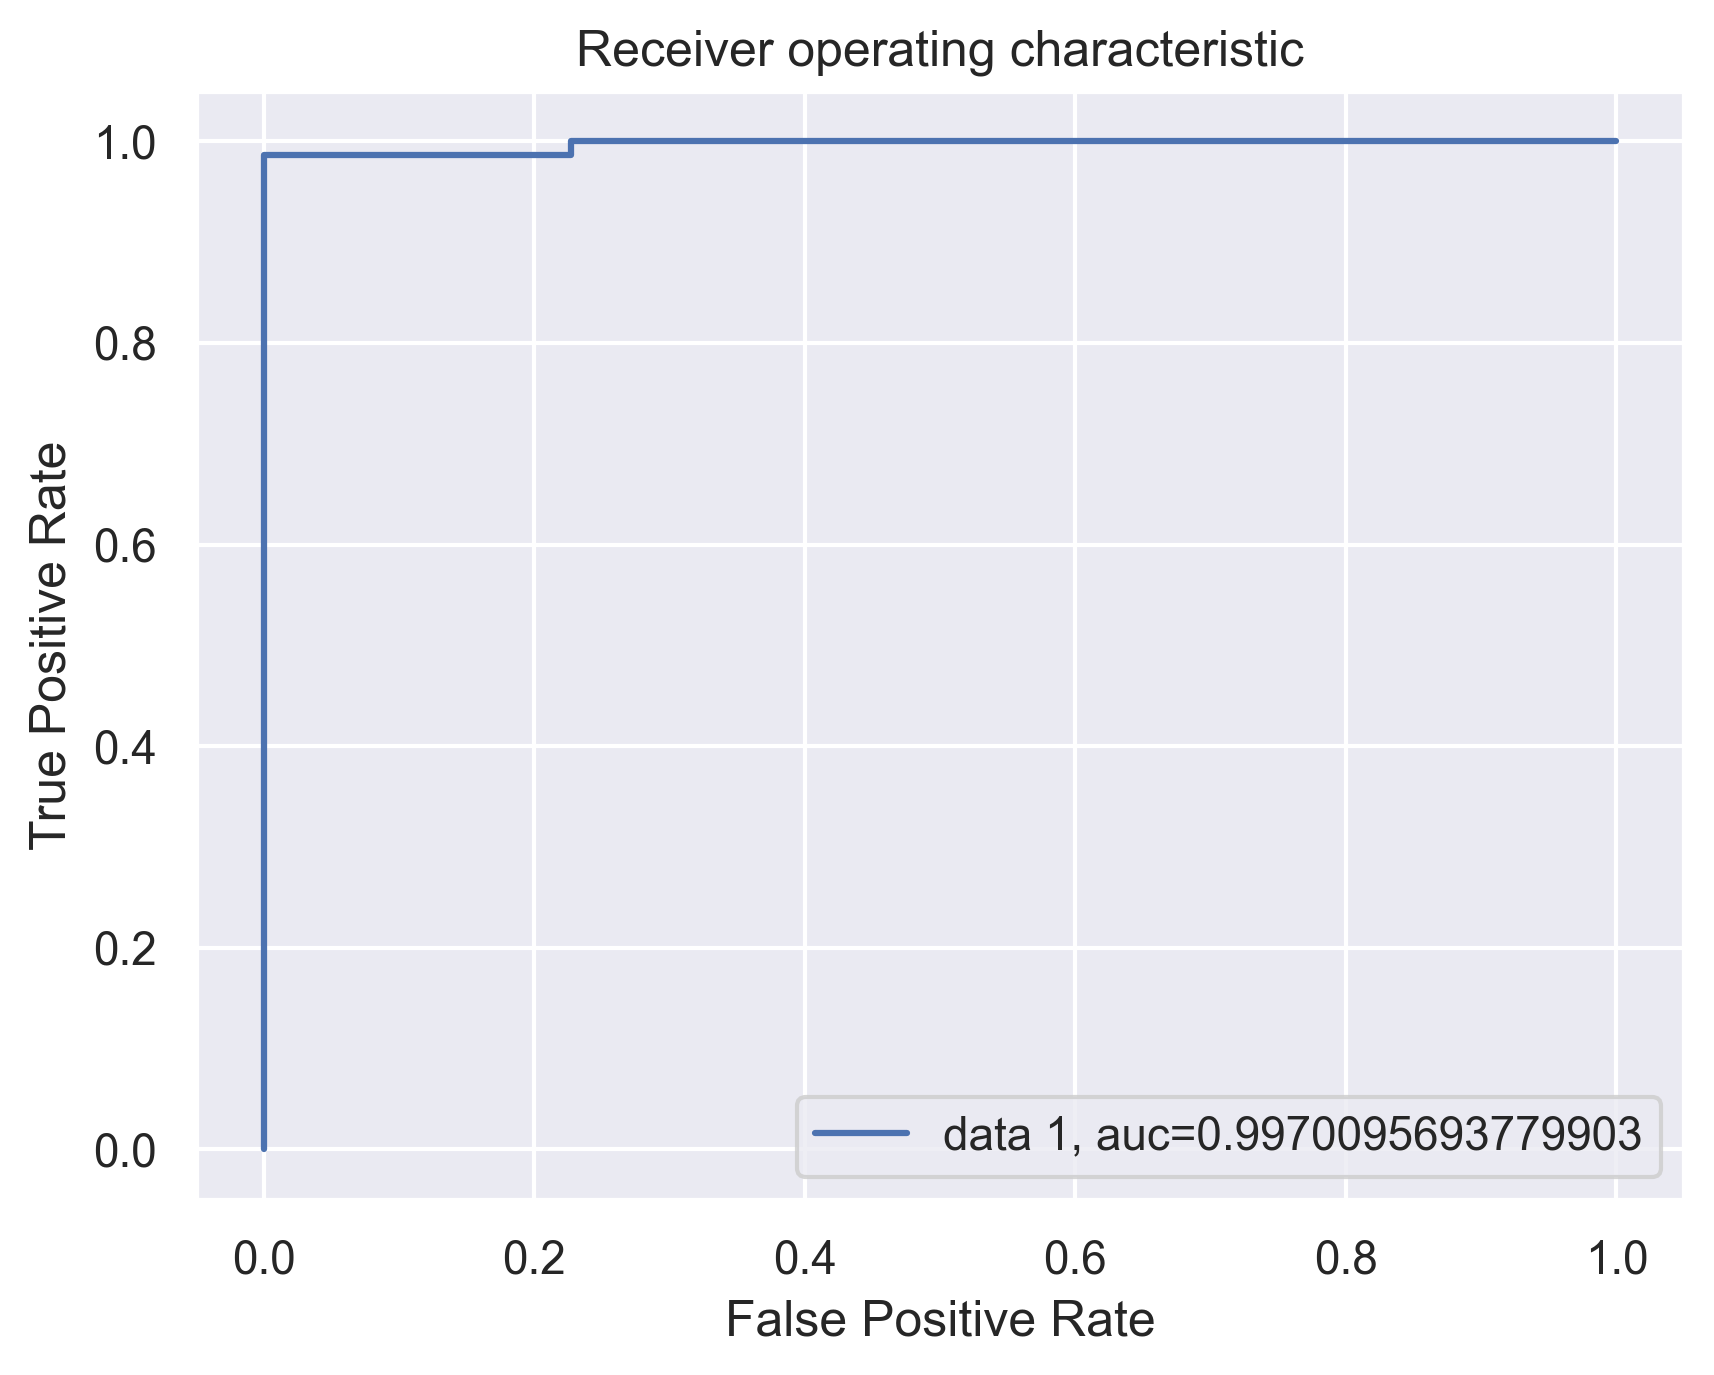

In [26]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [27]:
lr_tacc_down = lr.score(X_test,y_test)
lr_train_acc_down = lr.score(X_train_down, y_train_down)
lr_auc_down = auc
lr_auc_down

0.9970095693779903

## Decision Tree Classifier

In [28]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [29]:
dtree_grid_search(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 7}

### Over Sample Decision Tree

In [30]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11)
dTree.fit(X_train, y_train)

print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [31]:
dt_tacc = dTree.score(X_test,y_test)
dt_train_acc = dTree.score(X_train, y_train)

#### Confusion Matrix of Decision Tree Classifier

<Axes: >

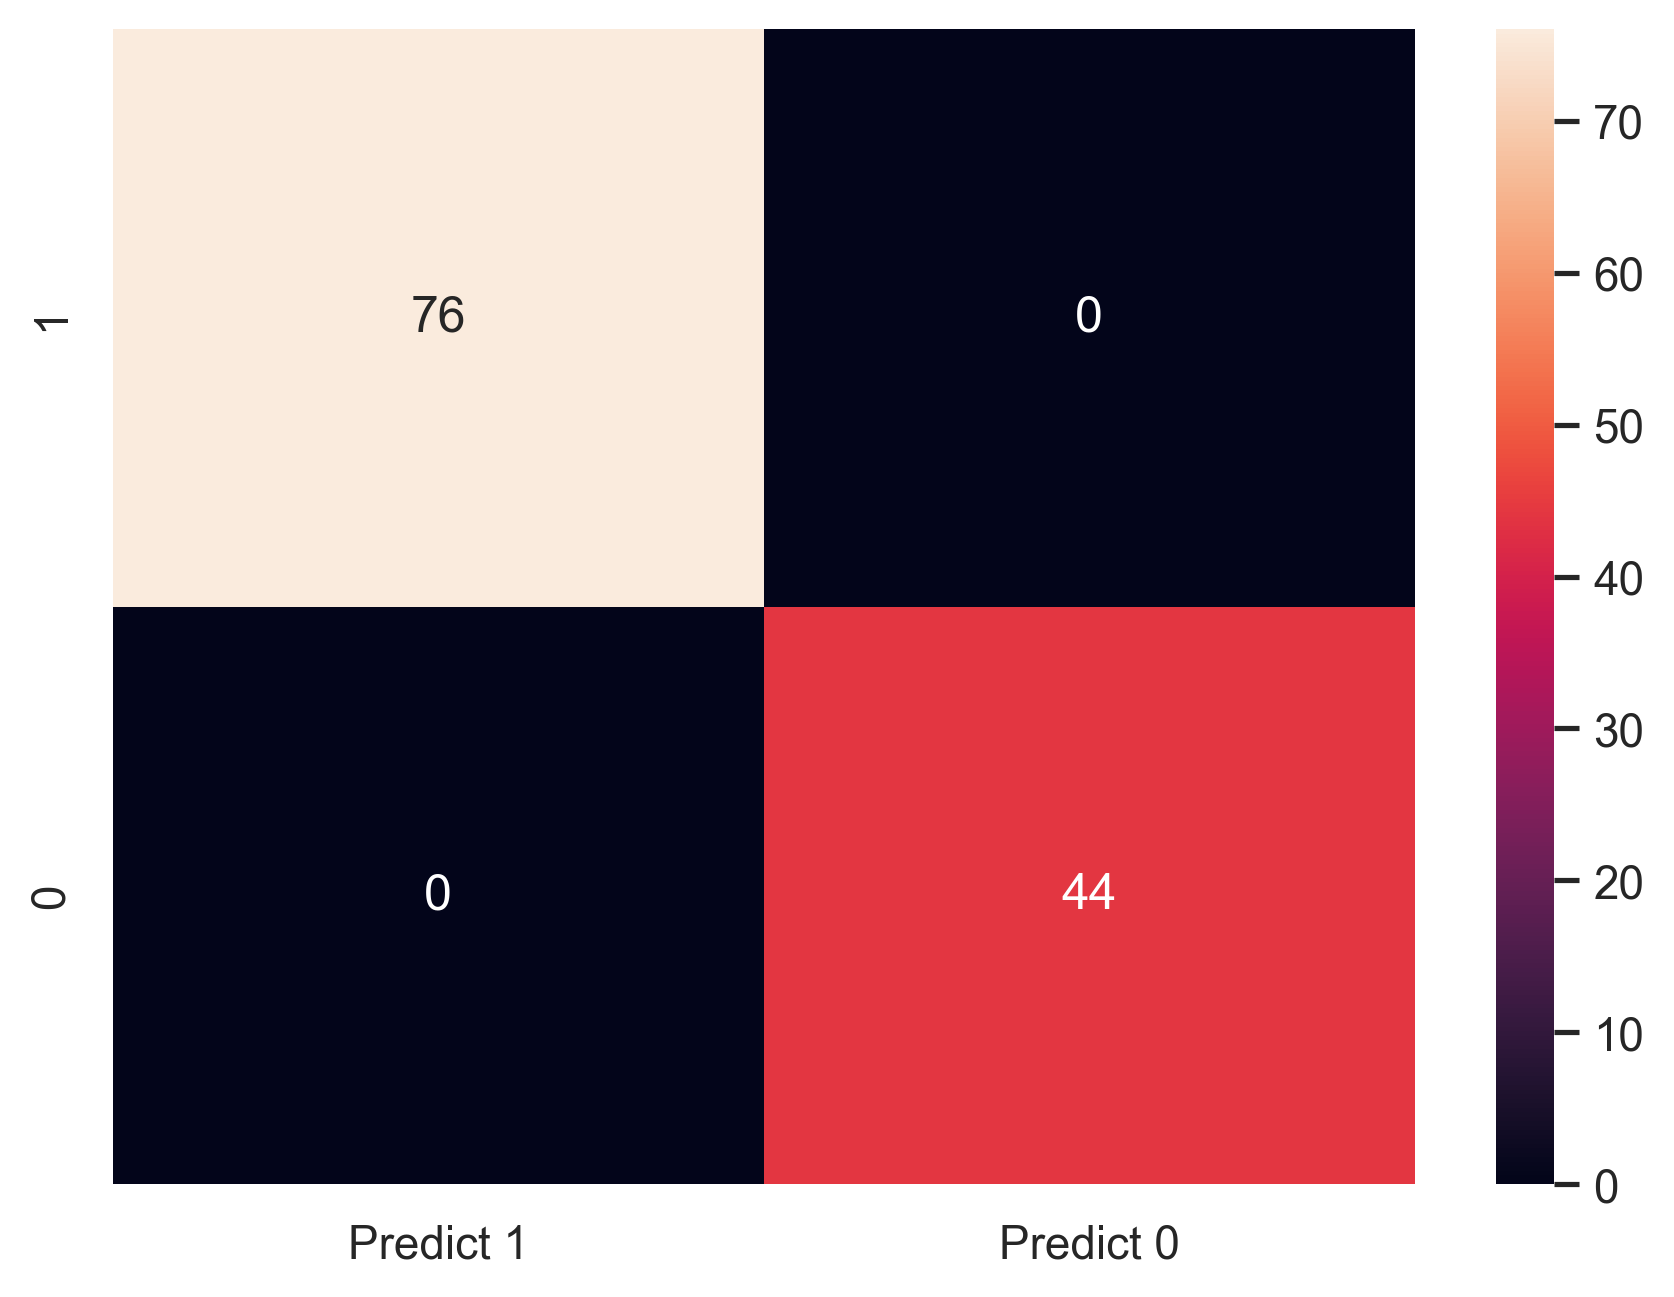

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of DecisionTree Model

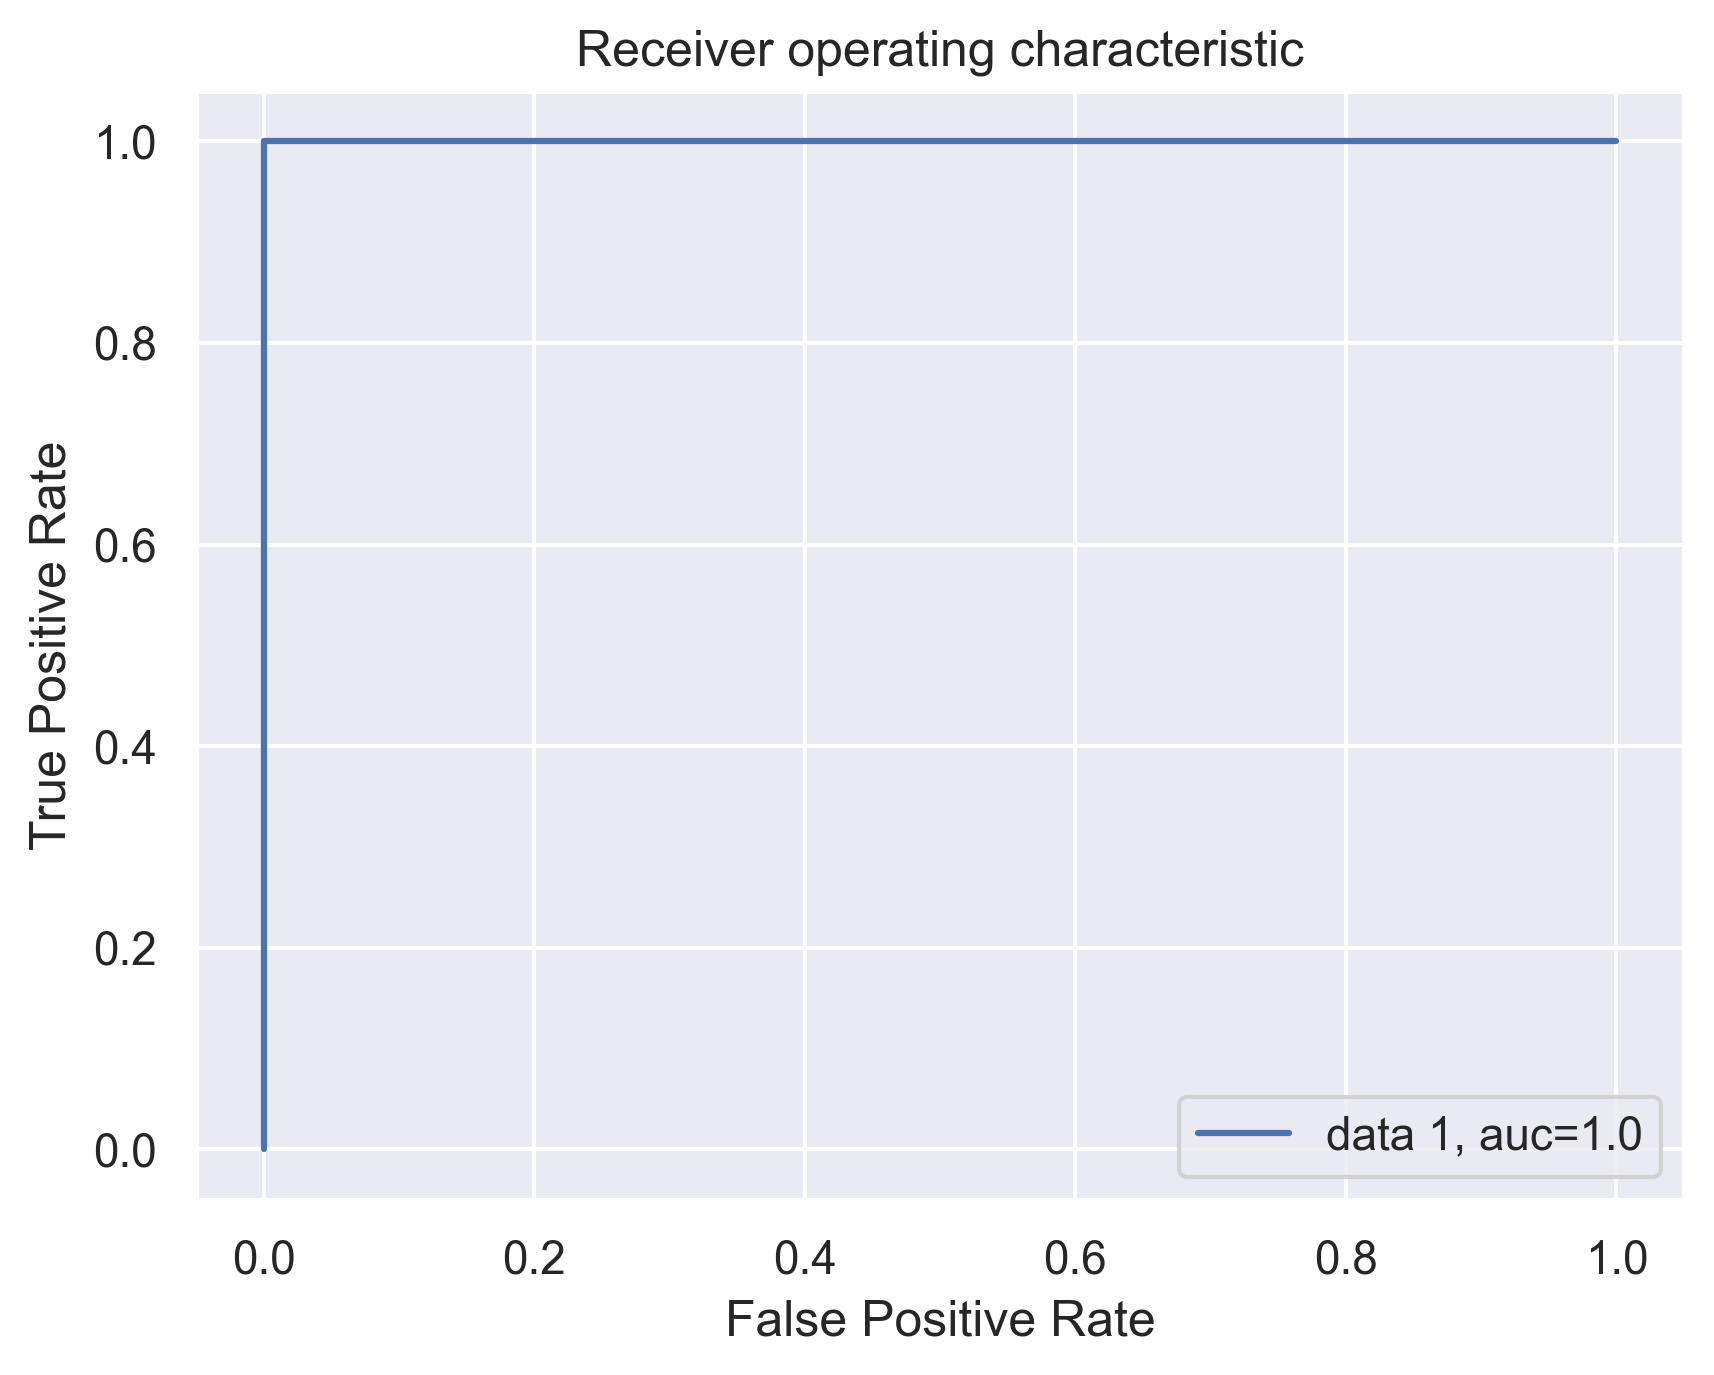

In [33]:
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [34]:
dt_auc = auc
dt_auc

1.0

### Under Sample Decision Tree

In [35]:
dtree_grid_search(X_train_down, y_train_down)

{'criterion': 'entropy', 'max_depth': 12}

In [36]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
dTree.fit(X_train_down, y_train_down)

print(dTree.score(X_train_down,y_train_down))
print(dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<Axes: >

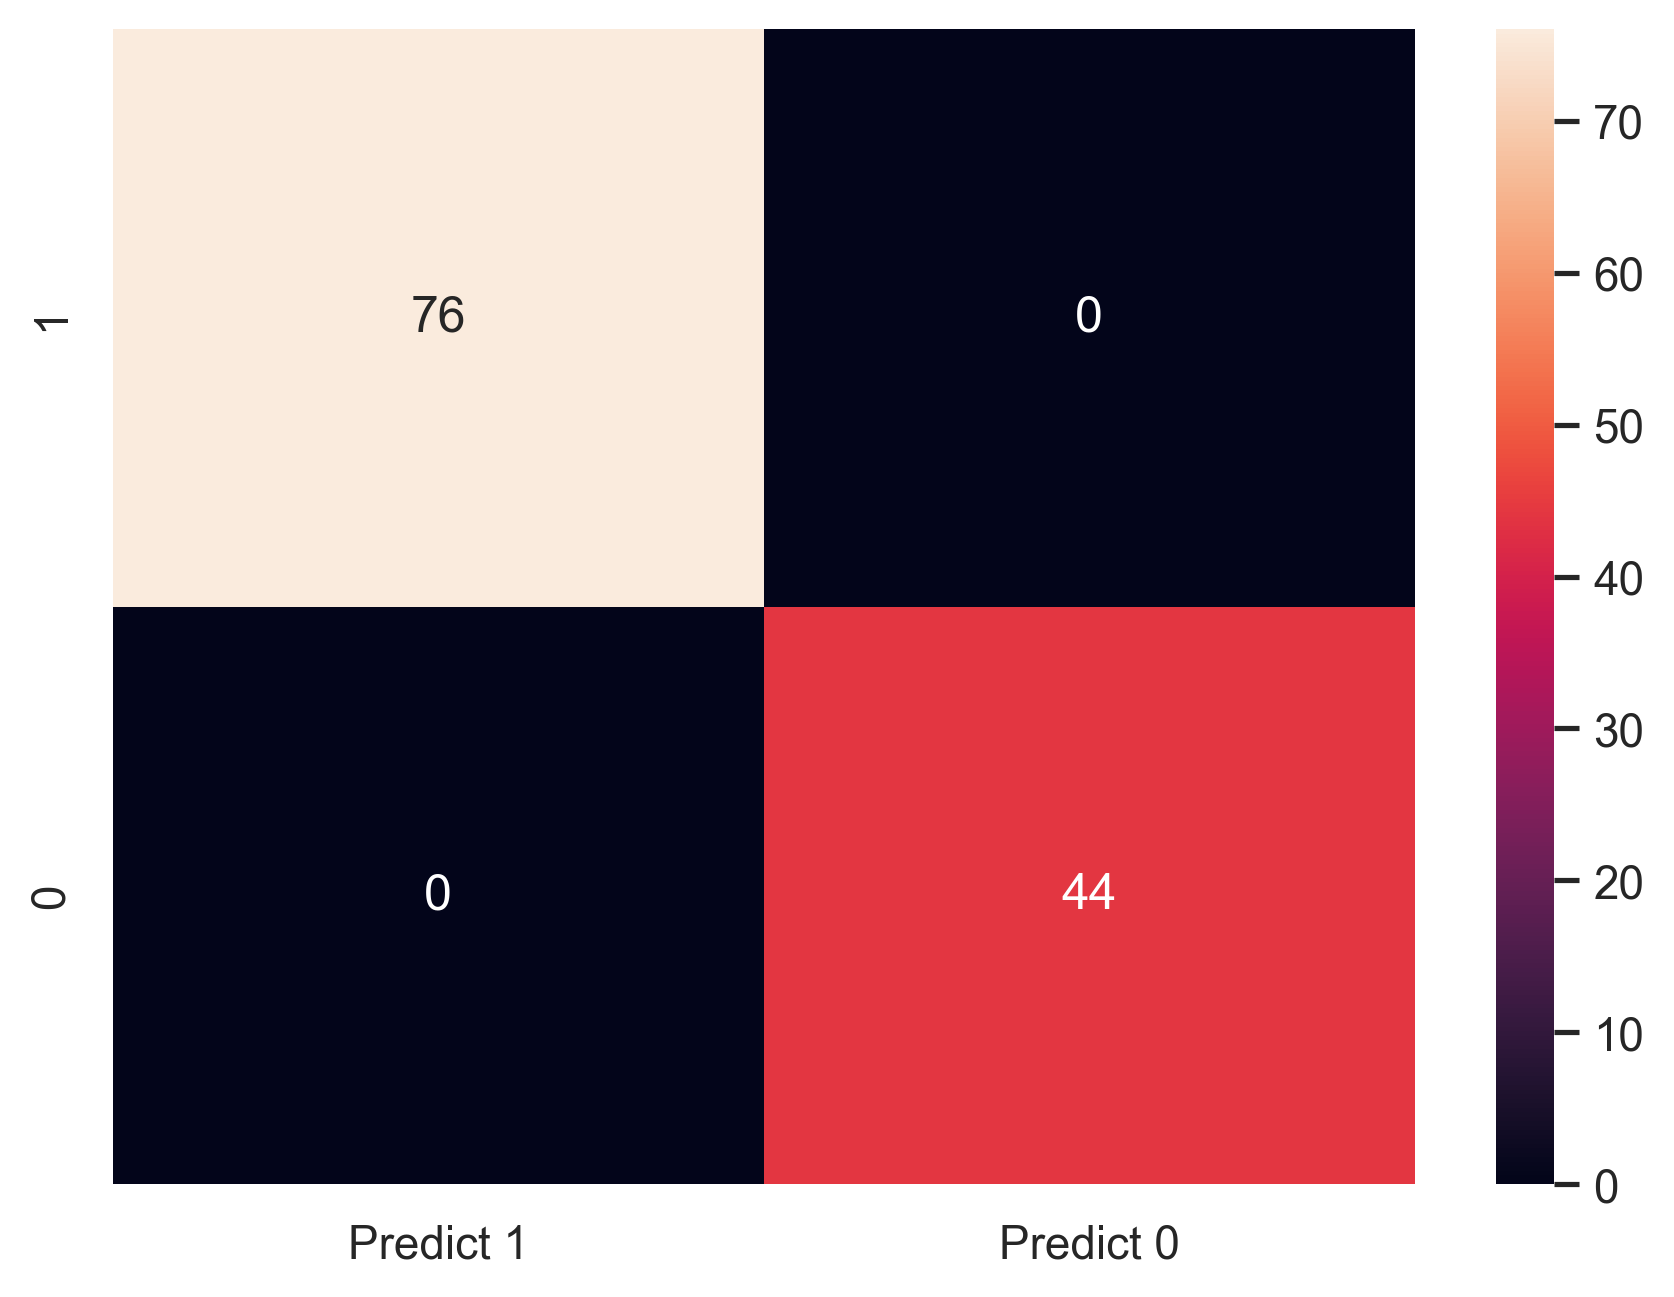

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

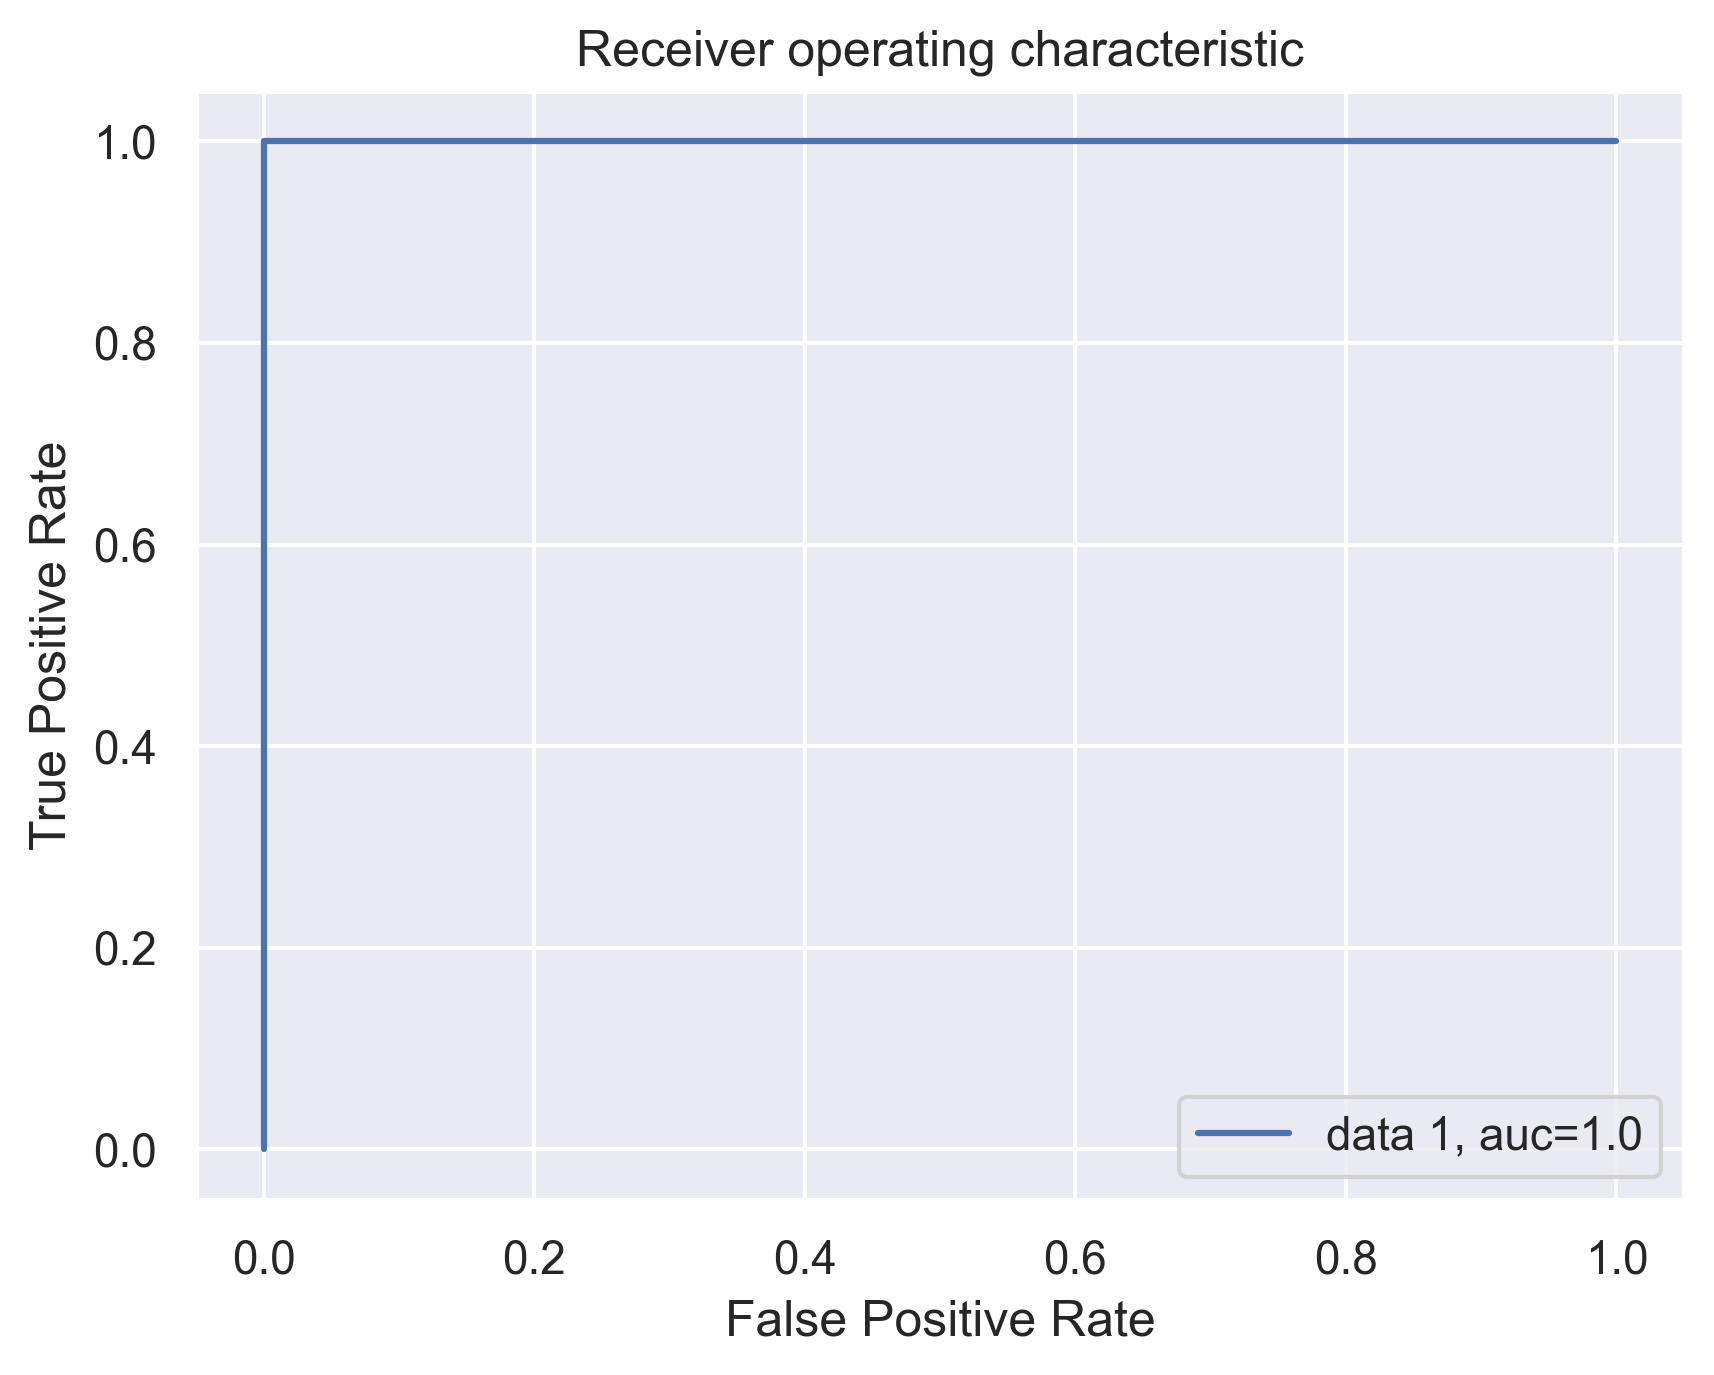

In [38]:
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [39]:
dt_tacc_down = dTree.score(X_test,y_test)
dt_train_acc_down = dTree.score(X_train_down, y_train_down)
dt_auc_down = auc
dt_auc_down

1.0

## Random forest classifier

In [40]:
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [41]:
rf_grid_search(X_train, y_train)

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 40}

### Over Sample Random Forest

In [42]:
rfcl = RandomForestClassifier(n_estimators=70, max_features='sqrt', max_depth=7, criterion='entropy')
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_train,y_train))
print(rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [43]:
rf_tacc = rfcl.score(X_test,y_test)
rf_train_acc = rfcl.score(X_train, y_train)

#### Confusion matrix of Random Forest Classifier Model

<Axes: >

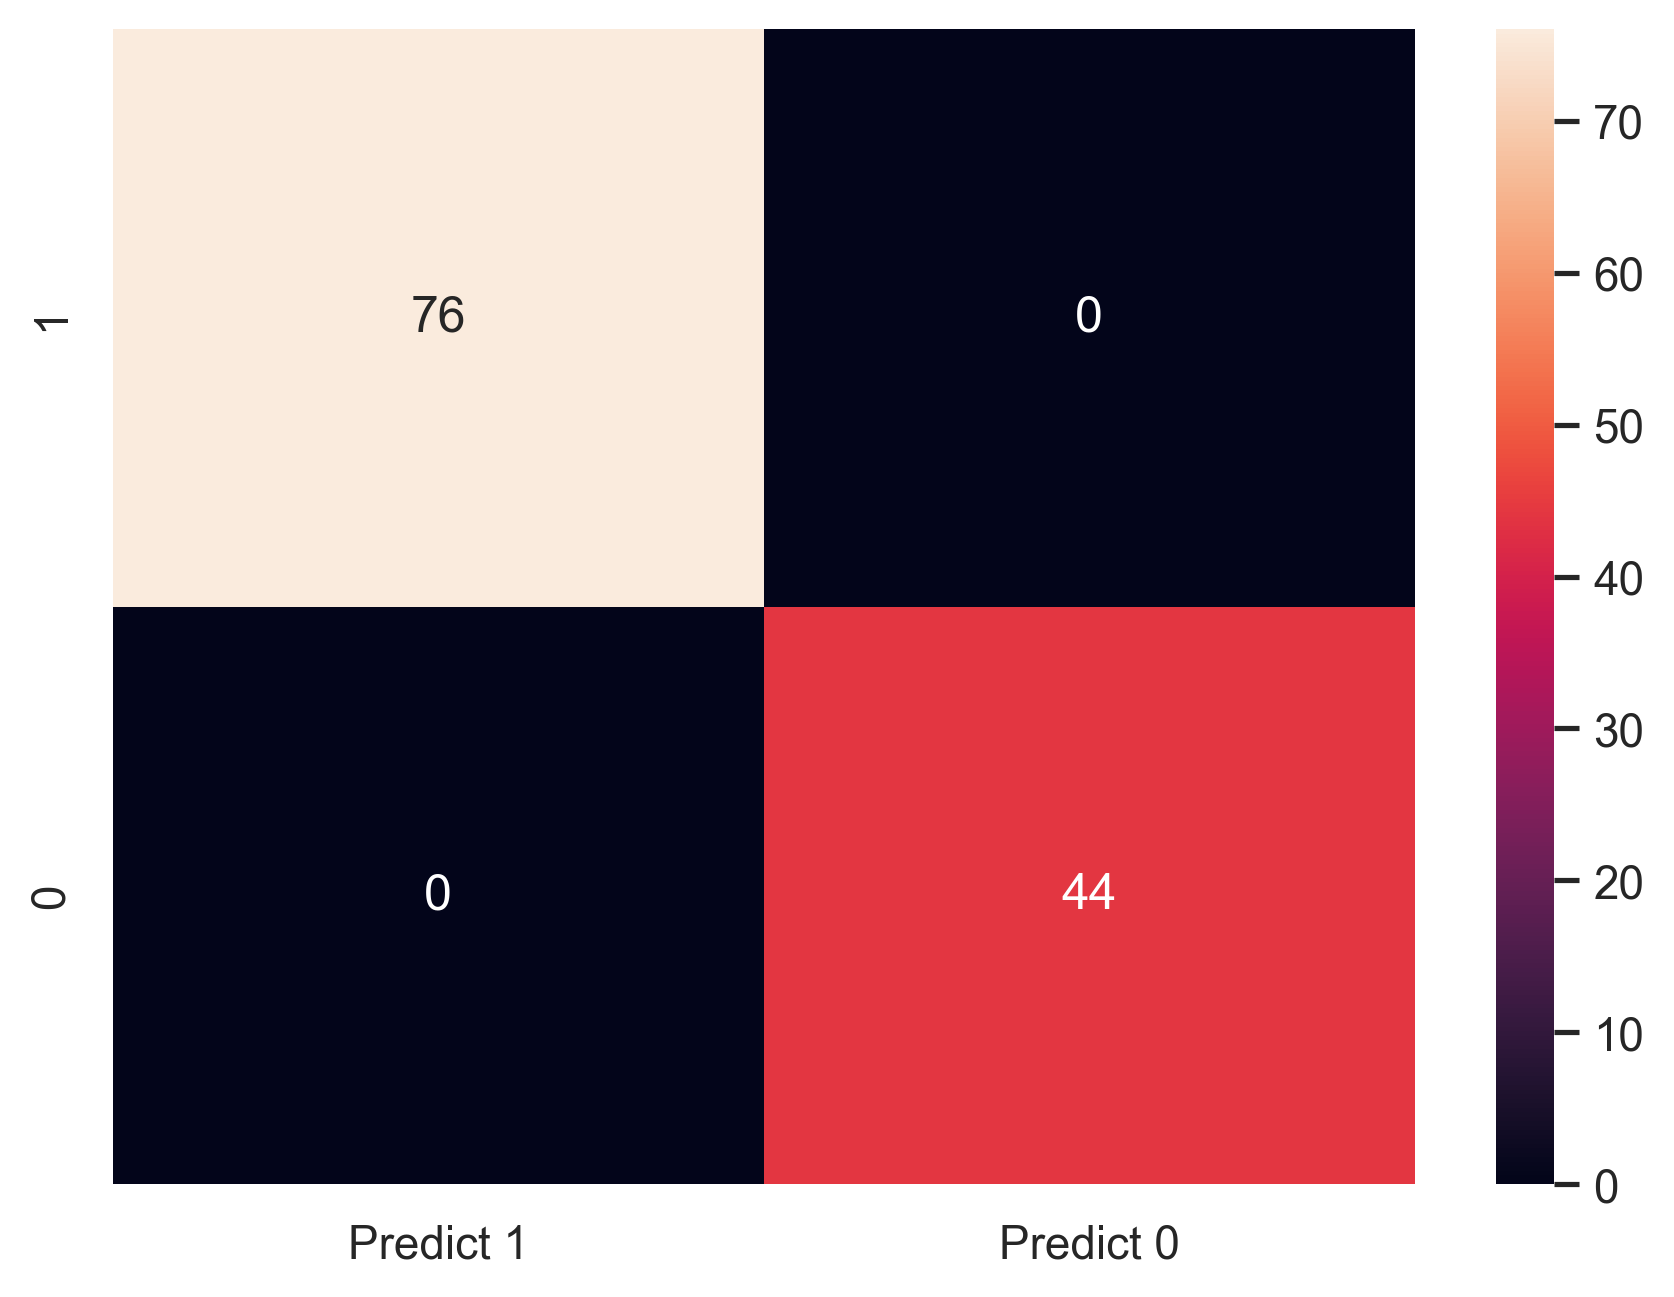

In [44]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of Random Forest Classifier Model

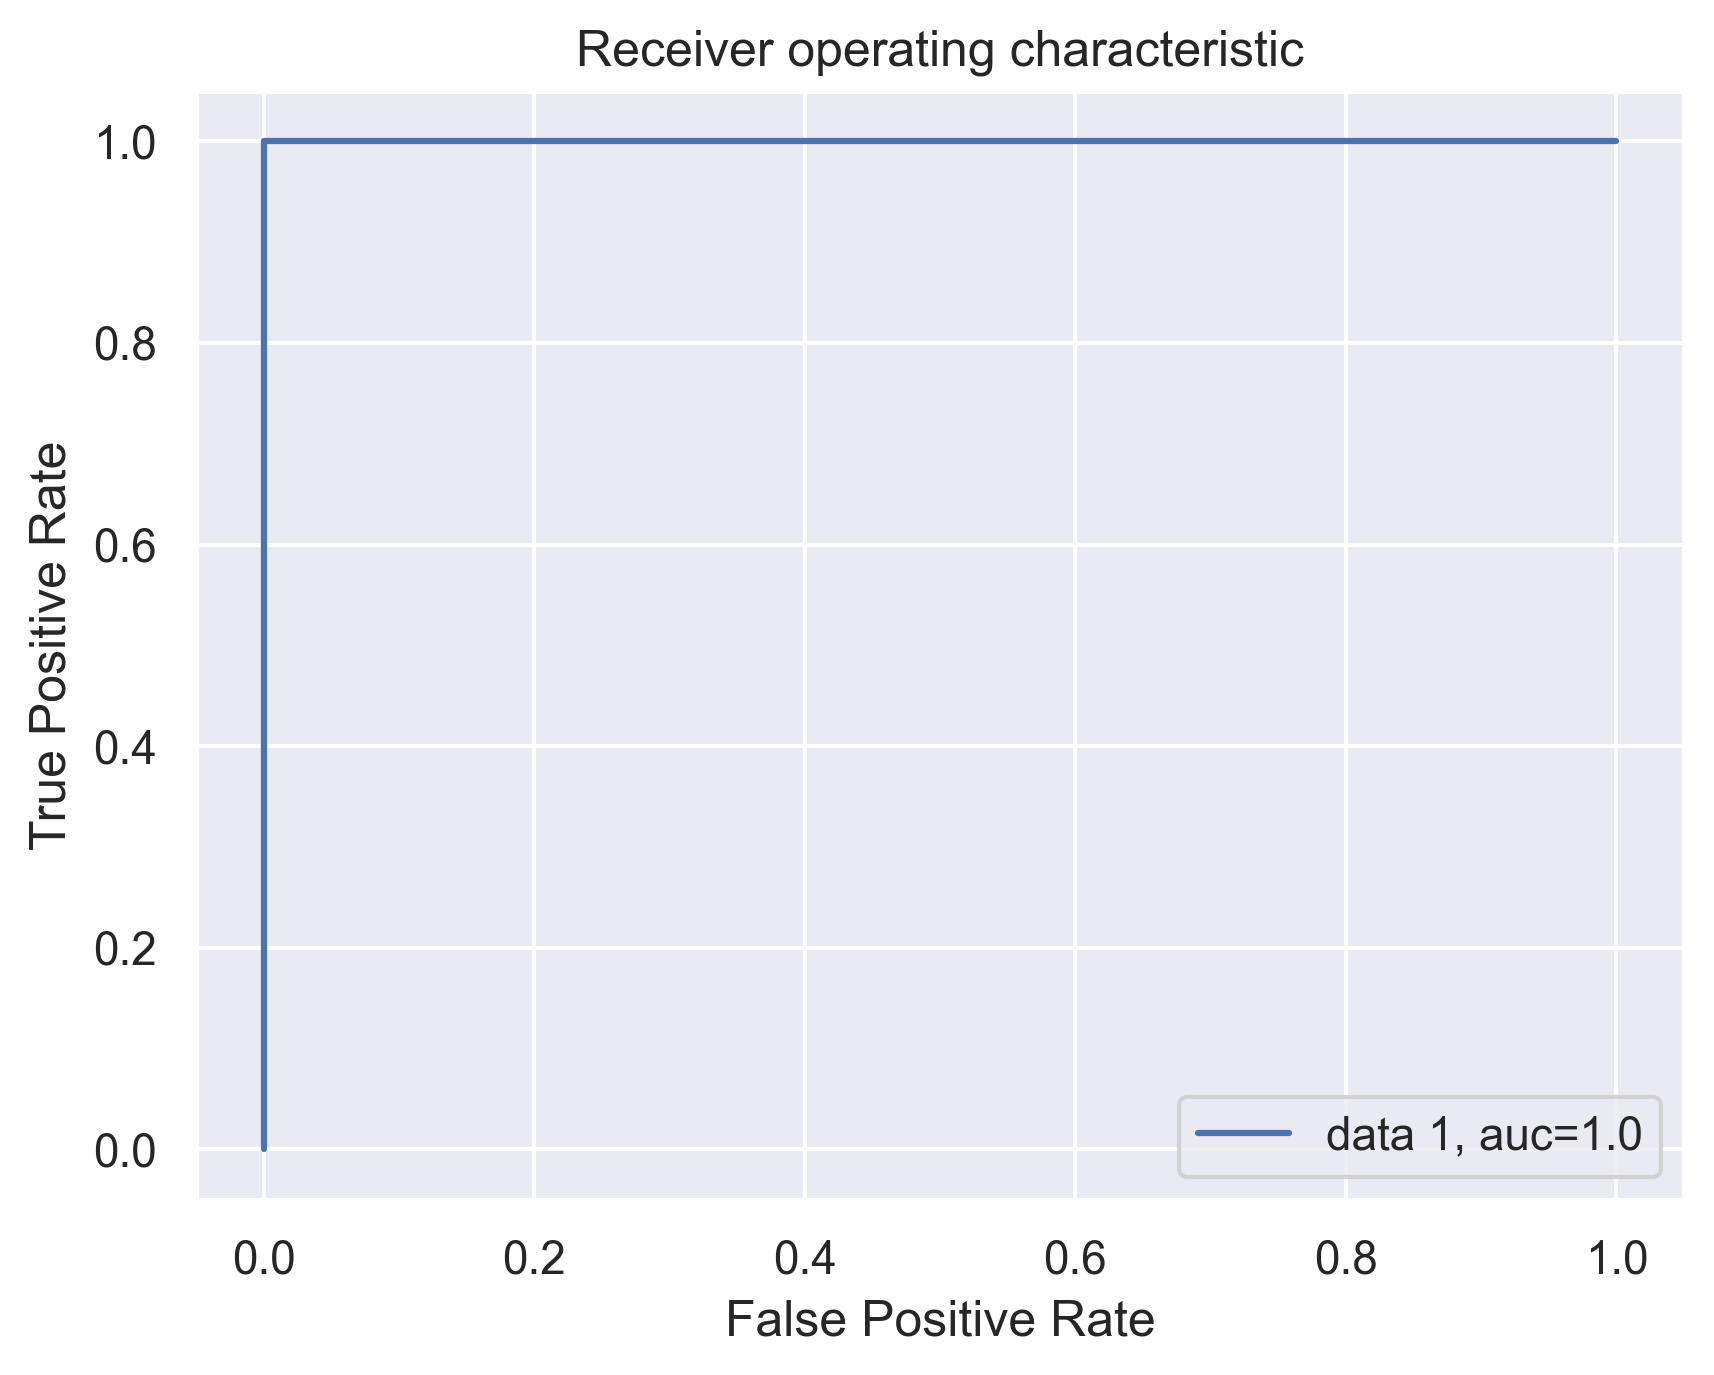

In [45]:
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [46]:
rf_auc = auc
rf_auc

1.0

### Under Sample Random Forest

In [47]:
rf_grid_search(X_train_down, y_train_down)

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 70}

In [48]:
rfcl = RandomForestClassifier(n_estimators=80, max_features='log2', max_depth=7, criterion='entropy')
rfcl = rfcl.fit(X_train_down, y_train_down)

y_pred_rf = rfcl.predict(X_test)

print(rfcl.score(X_train_down,y_train_down))
print(rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<Axes: >

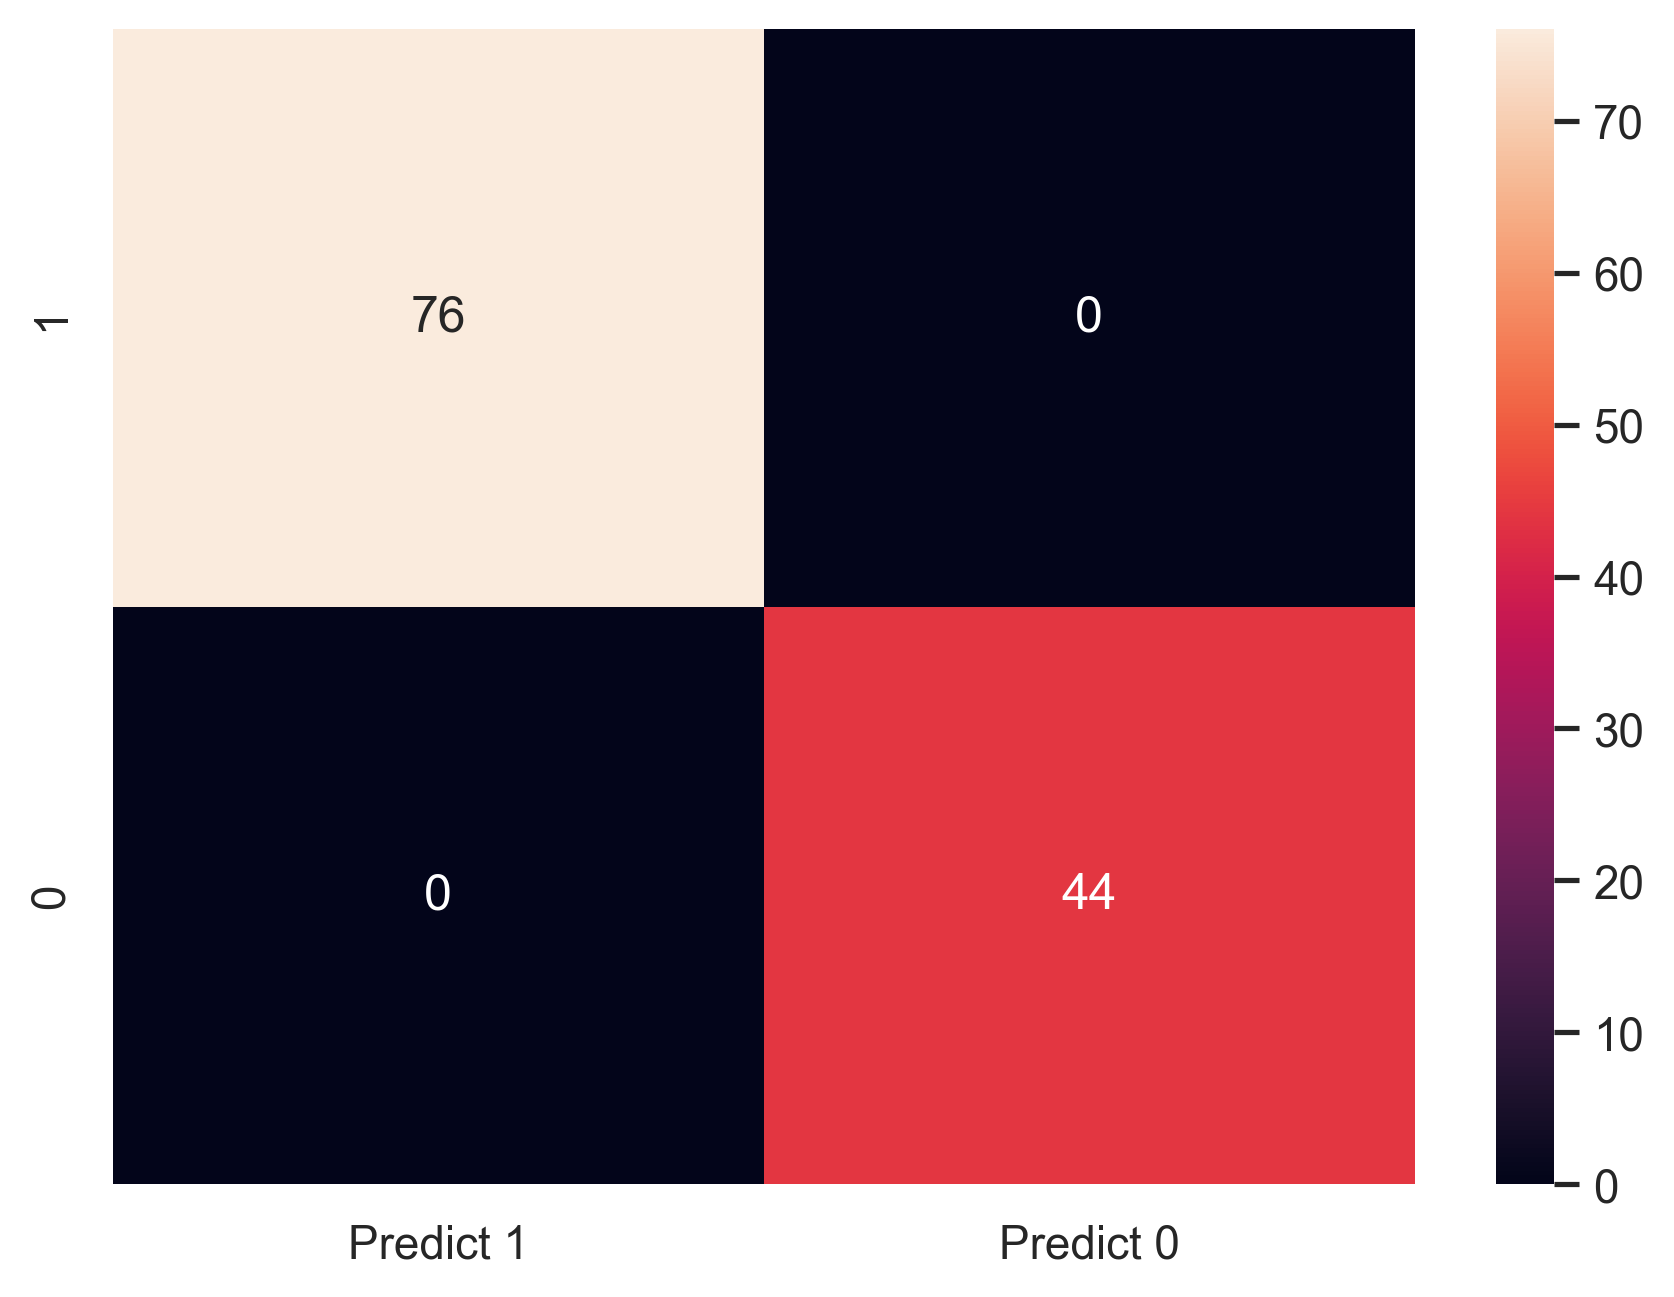

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

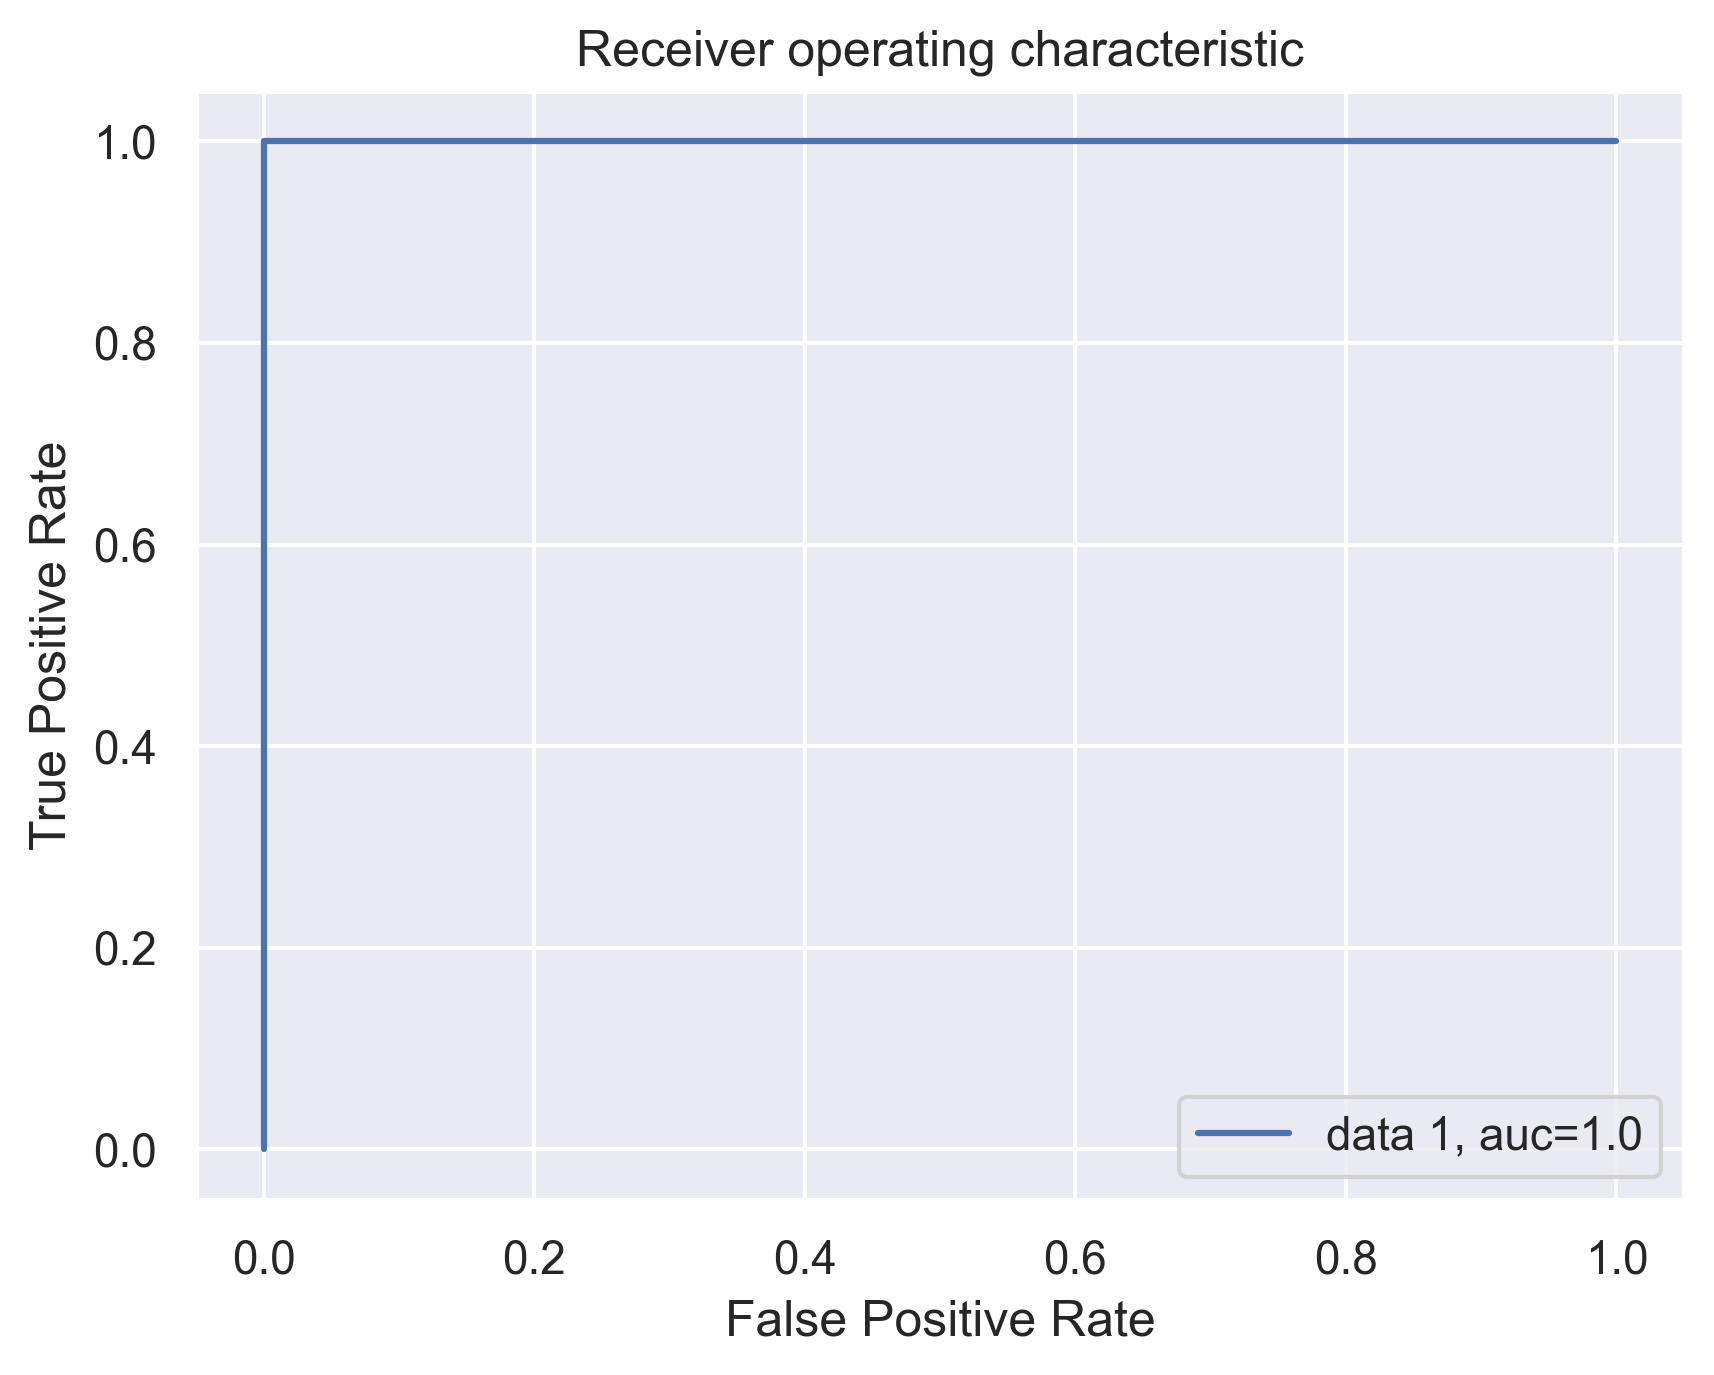

In [50]:
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [51]:
rf_tacc_down = rfcl.score(X_test,y_test)
rf_train_acc_down = rfcl.score(X_train_down, y_train_down)
rf_auc_down = auc
rf_auc_down

1.0

## SVM

In [52]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [53]:
svm_grid_search(X_train, y_train)

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

### Over Sample SVM

In [54]:
from sklearn import svm
svm = SVC(gamma=0.8, C=10, kernel='rbf', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

1.0
0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.96      0.99      0.97        76

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [55]:
svm_tacc = svm.score(X_test, y_test)
svm_train_acc = svm.score(X_train, y_train)

#### Confusion Matrix of SVM

<Axes: >

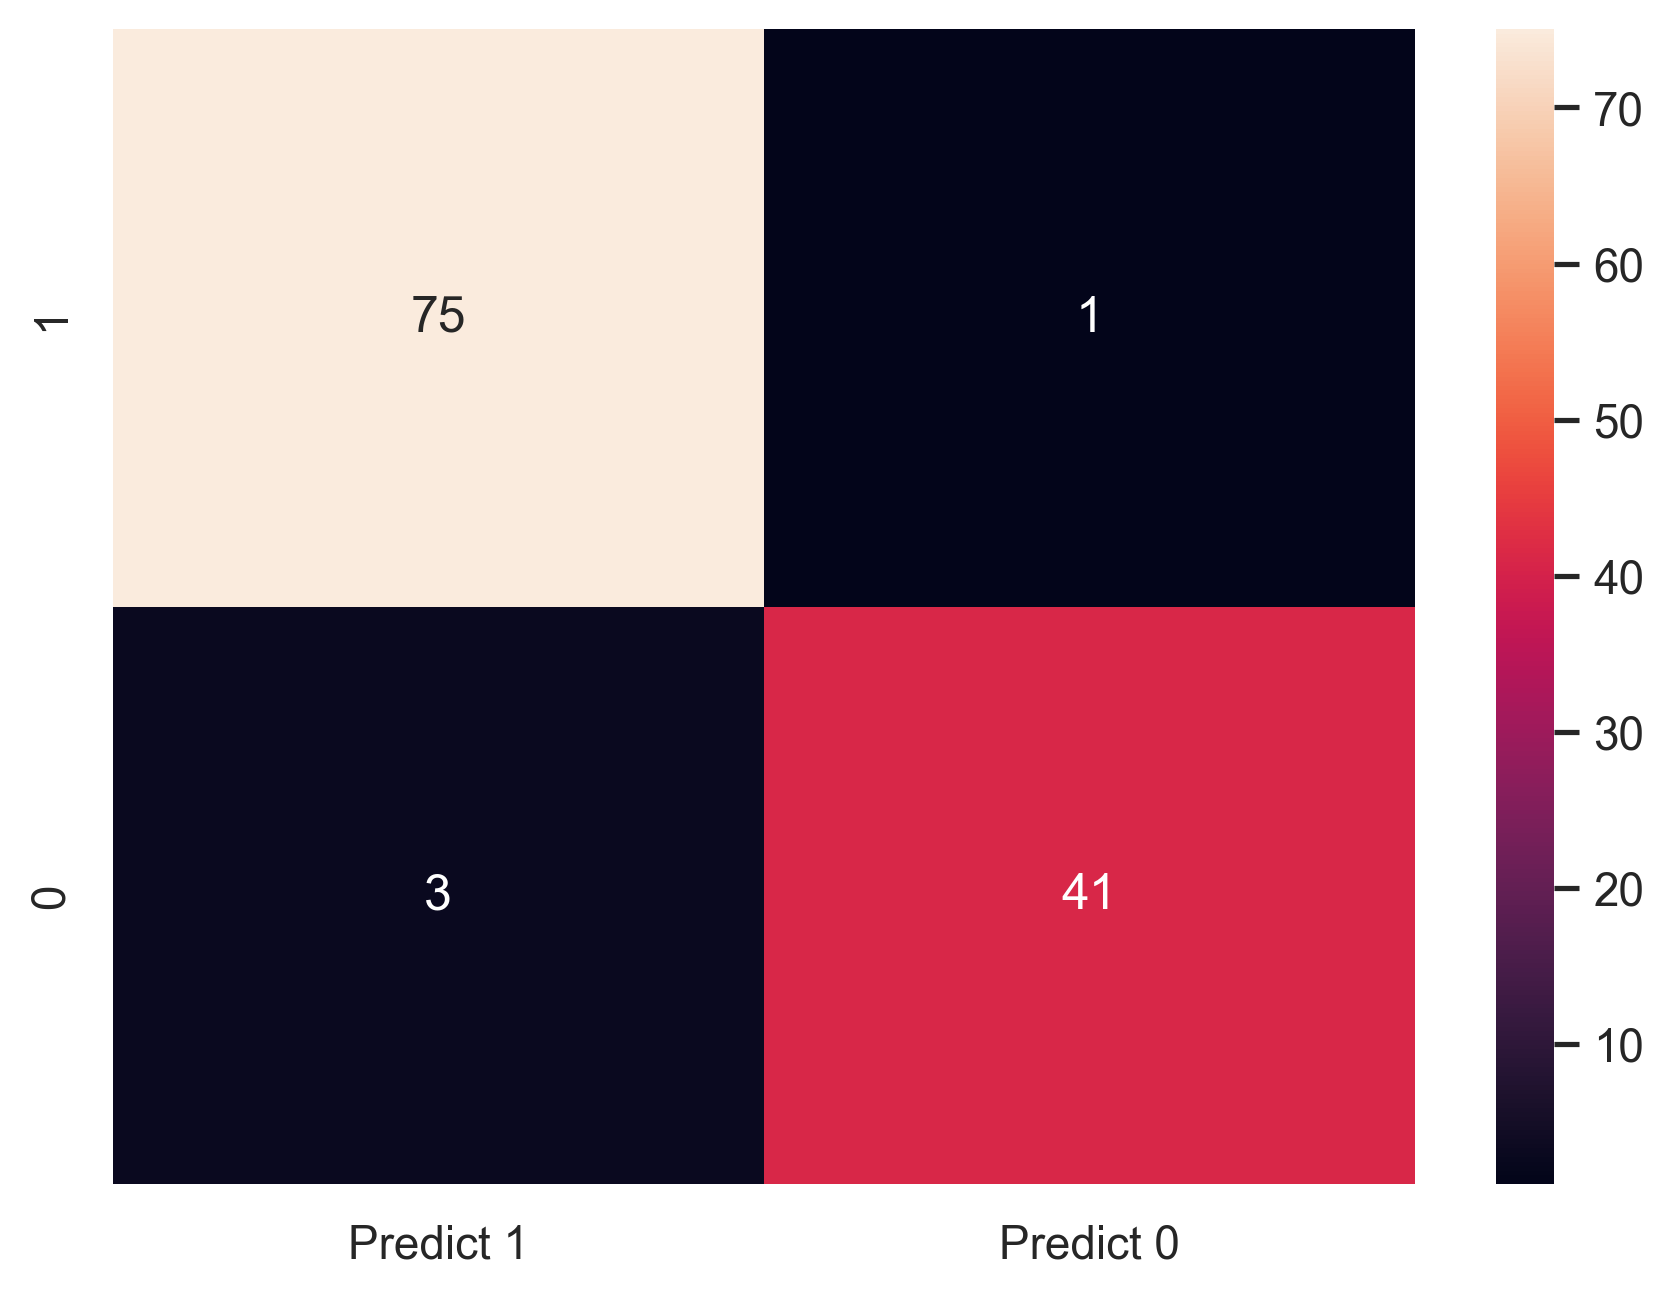

In [56]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

#### AUC of SVM

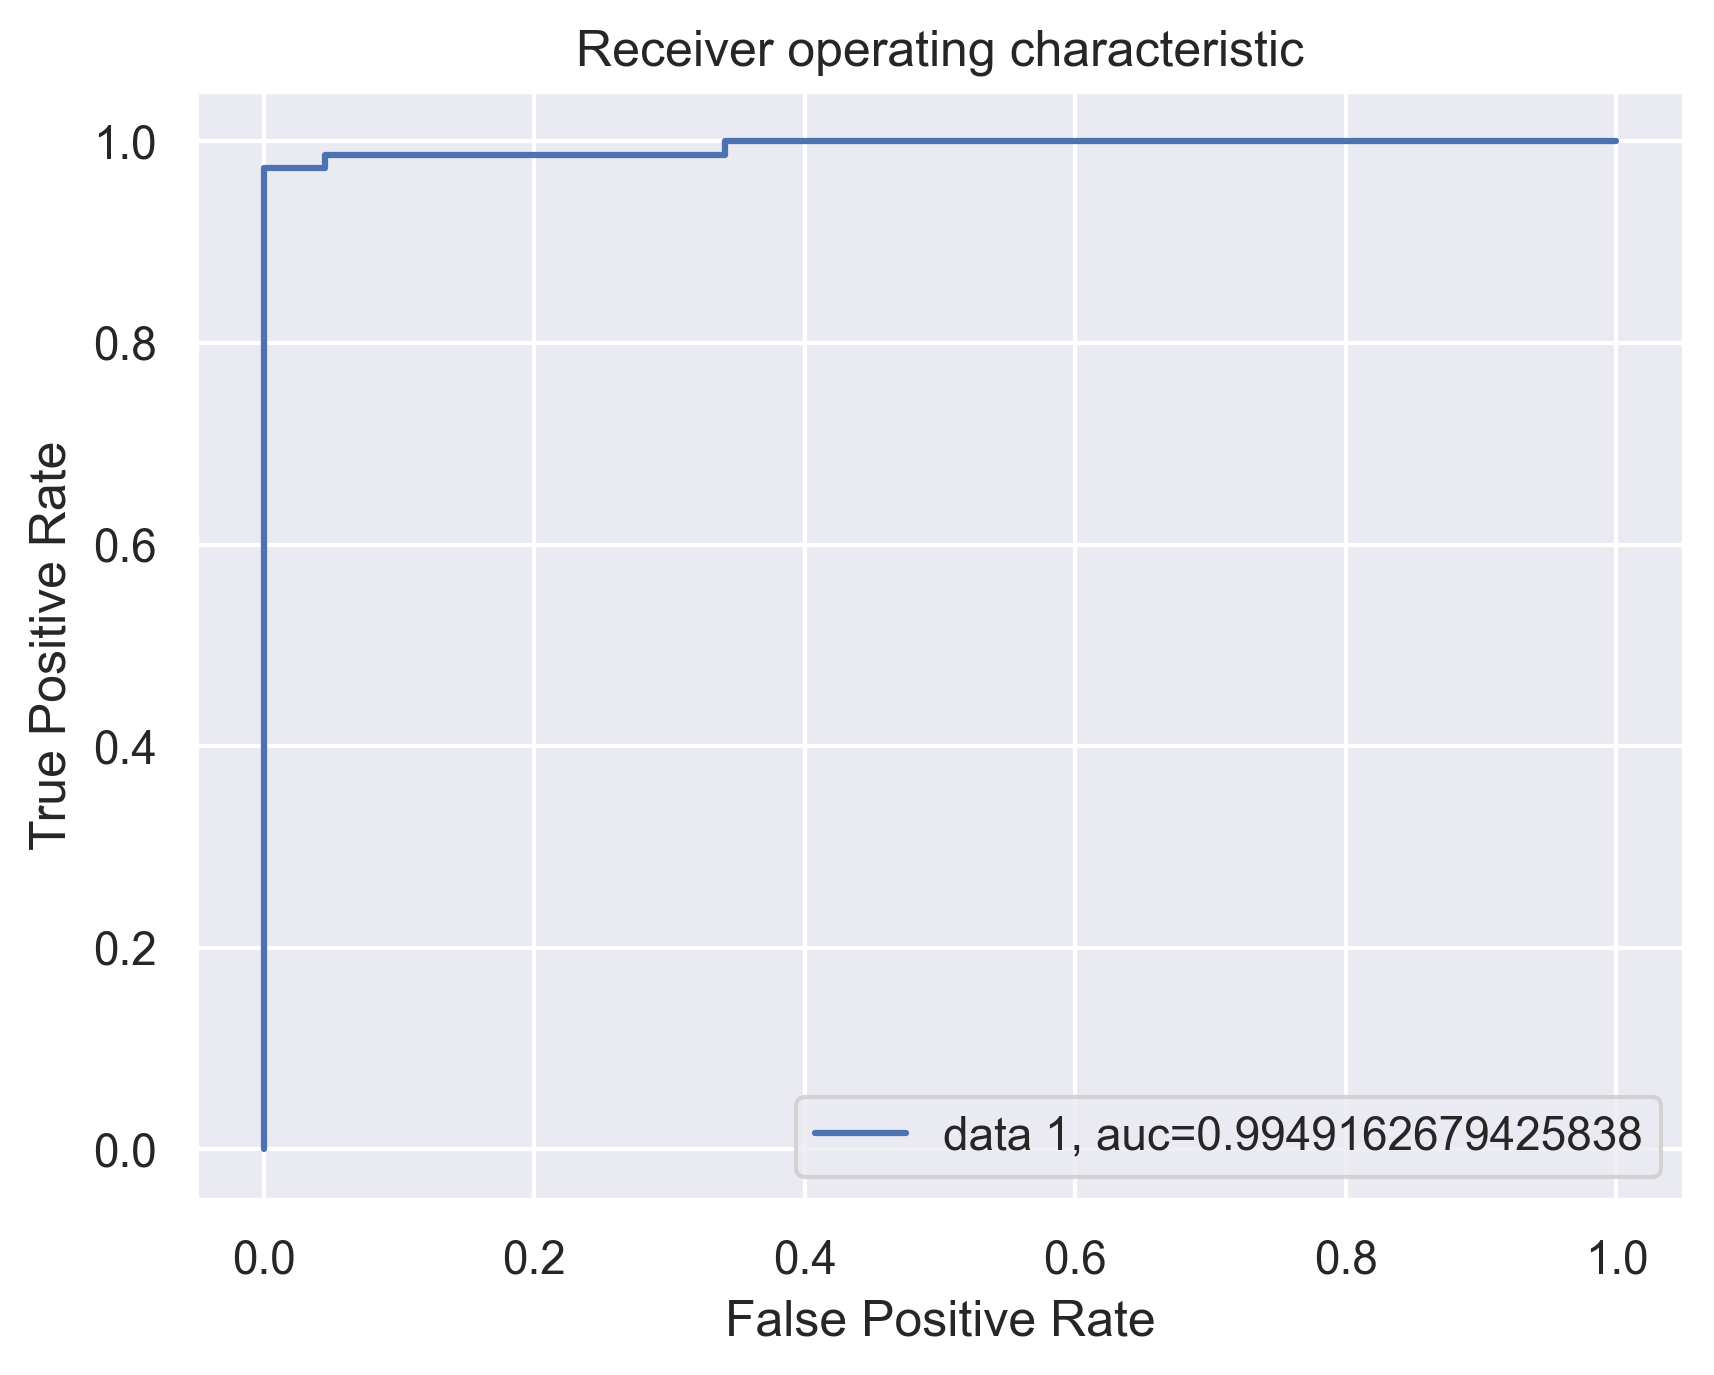

In [57]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [58]:
svm_auc = auc
svm_auc

0.9949162679425838

### Under Sample SVM

In [59]:
svm_grid_search(X_train_down, y_train_down)

{'kernel': 'rbf', 'gamma': 0.4, 'C': 100}

In [60]:
from sklearn import svm
svm = SVC(gamma=0.4, C=1, kernel='rbf', probability=True)

svm.fit(X_train_down, y_train_down)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train_down, y_train_down))
print(svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

1.0
0.9833333333333333
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



<Axes: >

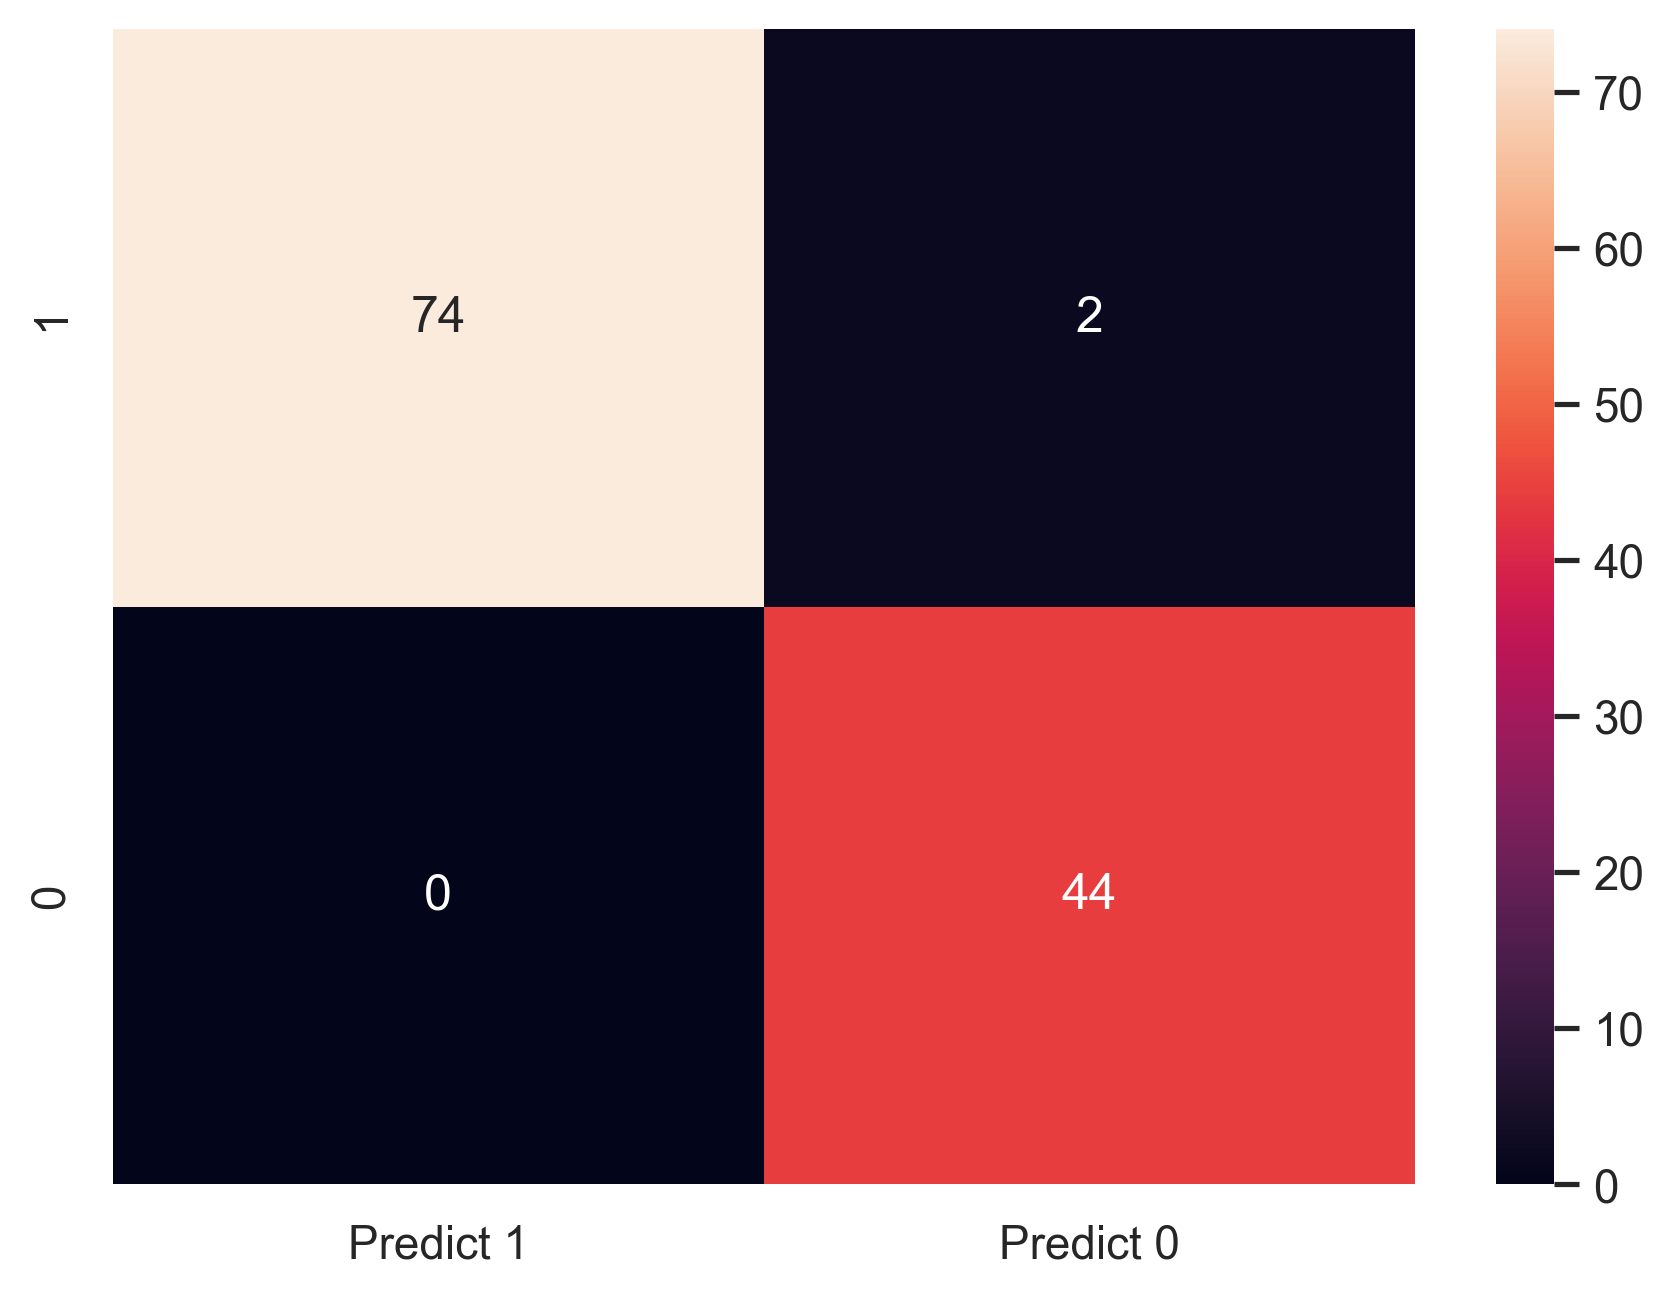

In [61]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

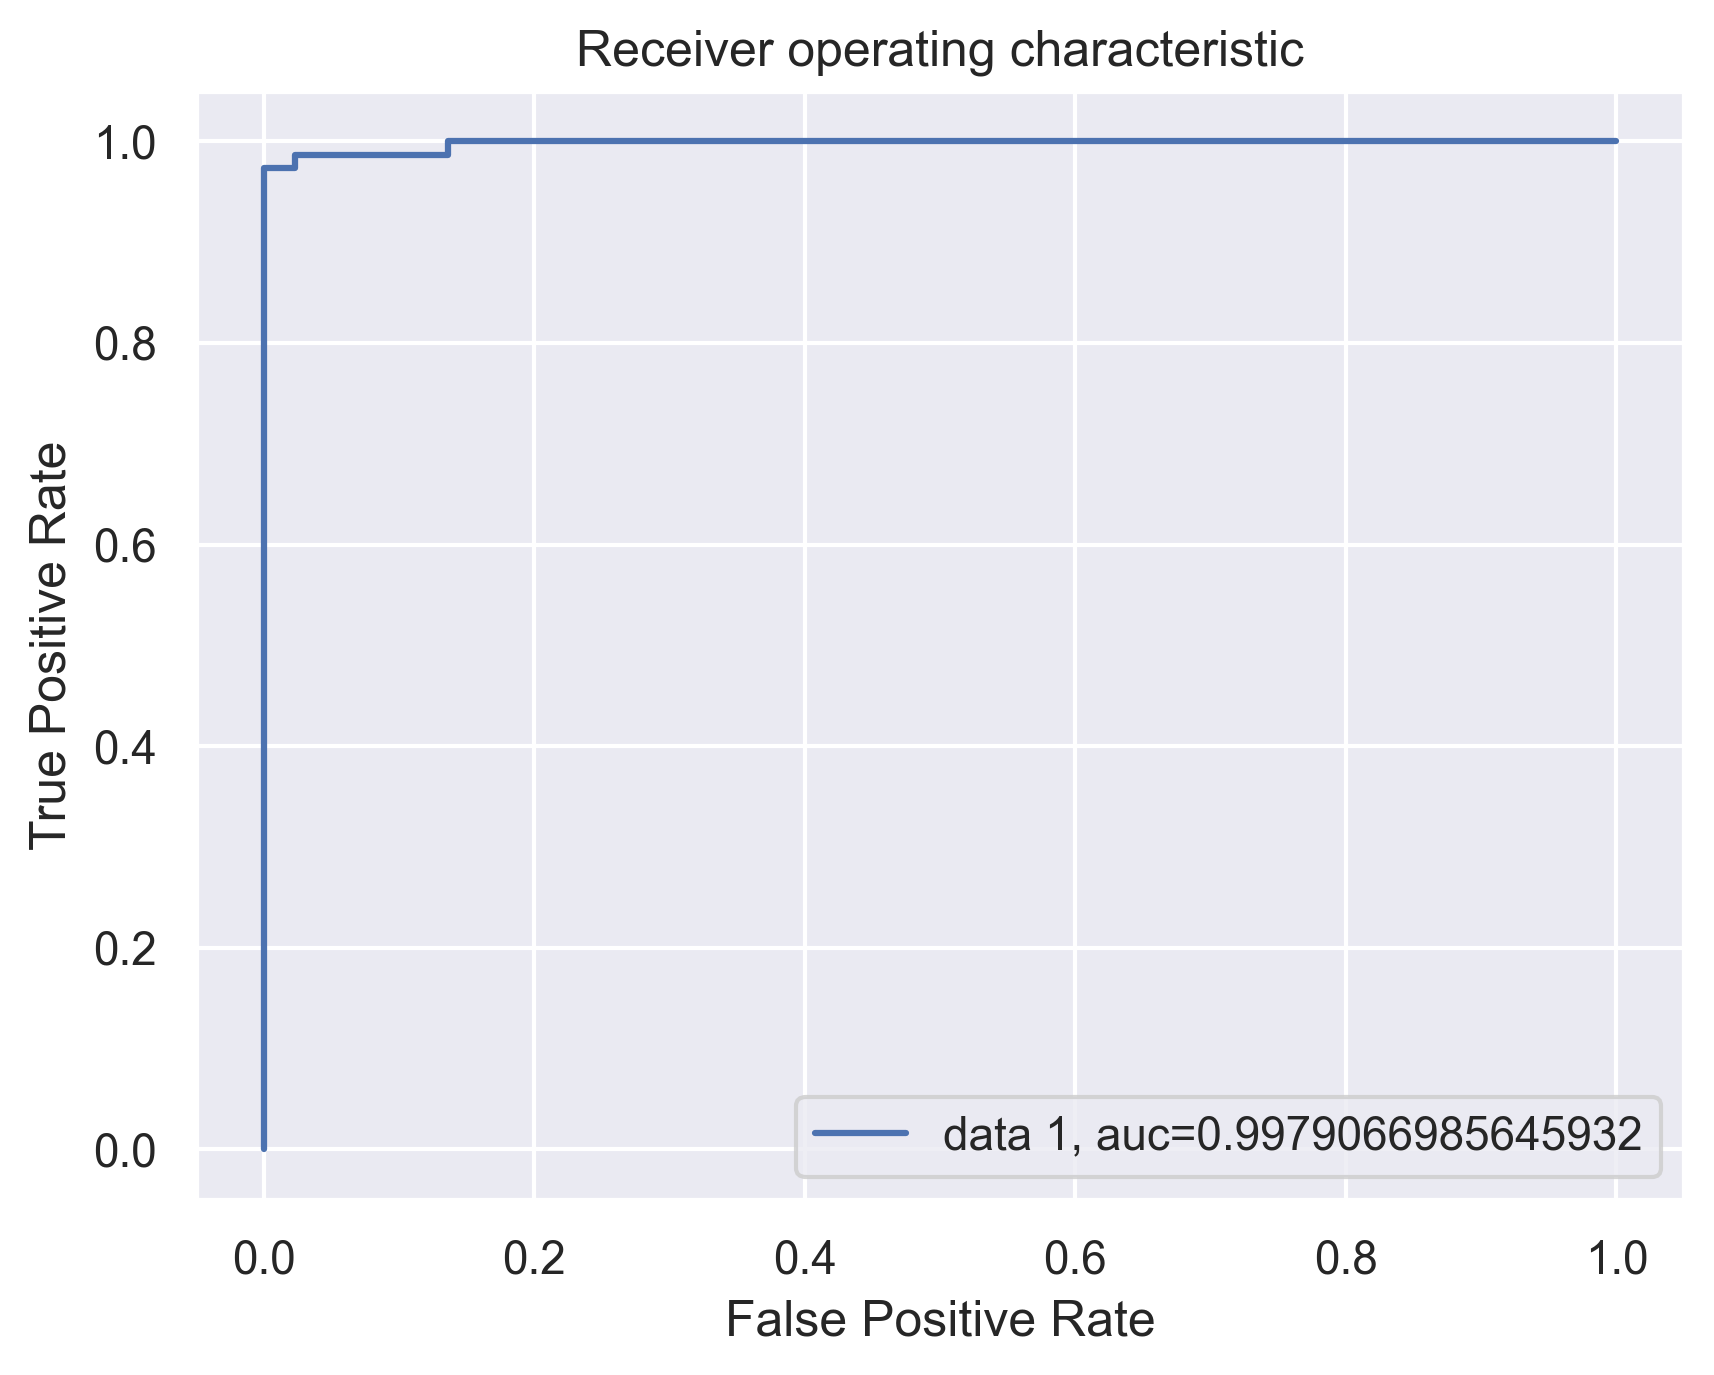

In [62]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [63]:
svm_tacc_down = svm.score(X_test, y_test)
svm_train_acc_down = svm.score(X_train_down, y_train_down)
svm_auc_down = auc
svm_auc_down

0.9979066985645932

# Comparision of all Models

## Over Sample Models

In [64]:
def comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Train Accuracy(%)": [i*100 for i in model_train_acc_list], "Test Accuracy(%)": [i*100 for i in model_test_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision

In [65]:
model_list = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "SVM"]
model_train_acc_list = [lr_train_acc, dt_train_acc, rf_train_acc, svm_train_acc]
model_test_acc_list = [lr_tacc, dt_tacc, rf_tacc, svm_tacc]
model_auc_list = [lr_auc, dt_auc, rf_auc, svm_auc]
comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list)

,Model Name,Train Accuracy(%),Test Accuracy(%),AUC Score
0,Logistic Regression,98.563218,98.333333,0.999103
1,Decision Tree Classifier,100.000000,100.000000,1.000000
2,Random Forest Classifier,100.000000,100.000000,1.000000
3,SVM,100.000000,96.666667,0.994916


- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes
- We can say that Random Forest Classifier Model and AdaBoost Model are good for our over sampled dataset as it is giving highest AUC score as well as highest accuracy.
- Lets do Cross Validation and find out which model is Best

## Under Sample Models

In [66]:
model_list = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier","SVM"]
model_train_acc_list = [lr_train_acc_down, dt_train_acc_down, rf_train_acc_down, svm_train_acc_down]
model_test_acc_list = [lr_tacc_down, dt_tacc_down, rf_tacc_down, svm_tacc_down]
model_auc_list = [lr_auc_down, dt_auc_down, rf_auc_down, svm_auc_down]
comp_model(model_list, model_train_acc_list, model_test_acc_list, model_auc_list)

,Model Name,Train Accuracy(%),Test Accuracy(%),AUC Score
0,Logistic Regression,100.0,97.500000,0.997010
1,Decision Tree Classifier,100.0,100.000000,1.000000
2,Random Forest Classifier,100.0,100.000000,1.000000
3,SVM,100.0,98.333333,0.997907


- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes
- We can say that Decision Tree Classifier Model, Random Forest Classifier Model, and XGBoost Model are good for our under sampled dataset as it is giving highest AUC score as well as highest accuracy.
- Lets do Cross Validation and find out which model is Best

# Cross Validation

## Without over or down sampling

### Random Forest Classfier

In [67]:
skfold = StratifiedKFold(n_splits=5)
model = RandomForestClassifier(n_estimators=70, max_features='sqrt', max_depth=7, criterion='entropy')
scores = cross_val_score(model, features, y, cv=skfold)

print(scores)
print(np.mean(scores))

[0.9875 1.     0.9375 1.     0.9875]
0.9824999999999999


## Over Sample CV

In [68]:
len(y[y==0]), len(y[y==1])

(150, 250)

In [69]:
os =  RandomOverSampler(sampling_strategy=1)

X_train, y_train = os.fit_resample(features, y)

print(len(y_train[y_train==0]), len(y_train[y_train==1]))
print(len(X_train))

250 250
500


### Random Forest Classifier

In [70]:
skfold = StratifiedKFold(n_splits=5)
model = RandomForestClassifier(n_estimators=70, max_features='sqrt', max_depth=7, criterion='entropy')
scores = cross_val_score(model, X_train, y_train, cv=skfold)

print(scores)
print(np.mean(scores))

[1.   0.99 0.98 1.   0.99]
0.992


## Under Sample CV

In [71]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_train_down,y_train_down = rus.fit_resample(features, y)

print(len(y_train_down[y_train_down==0]), len(y_train_down[y_train_down==1]))
print(len(X_train_down))

150 150
300


### Decision Tree Classifier

In [72]:
skfold = StratifiedKFold(n_splits=5)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
scores = cross_val_score(model, X_train_down,y_train_down, cv=skfold)

print(scores)
print(np.mean(scores))

[0.96666667 0.98333333 0.85       0.95       0.95      ]
0.9400000000000001


### Random Forest Classifier

In [73]:
skfold = StratifiedKFold(n_splits=5)
model = RandomForestClassifier(n_estimators=80, max_features='log2', max_depth=7, criterion='entropy')
scores = cross_val_score(model, X_train_down, y_train_down, cv=skfold)

print(scores)
print(np.mean(scores))

[0.98333333 0.98333333 0.95       0.96666667 1.        ]
0.9766666666666666


**Observations:**
- From this Cross Validation, we can conclude that **Random Forest Classifier model** is best for our project. Also model showing hgiher accuracy and auc score in **over sampling**.

# Building the Prediction System - Random Forest Classifier

In [1]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Chronic Kidney Disease Detected" if rfcl.predict(in_data_sca) else "Chronic Kidney Disease Not Detected")

NameError: name 'np' is not defined

***Extra data on which you can try our both Prediction System***

Chronic Disease Positive:
- [48, 80, 1, 0, 1, 1, 0, 0, 121, 36, 1.2, 111, 15.4, 7800, 5.2, 1, 1, 0, 1, 0, 0]
- [7, 50, 4, 0, 1, 1, 0, 0, 121, 18, 0.8, 111, 11.3, 6000, 5.2, 0, 0, 0, 1, 0, 0]

Chronic Disease Negative:
- [40, 80, 0, 0, 1, 1, 0, 0, 140, 10, 1.2, 135, 15, 10400, 4.5, 0, 0, 0, 1, 0, 0]
- [23, 80, 0, 0, 1, 1, 0, 0, 70, 36, 1, 150, 17, 9800, 5, 0, 0, 0, 1, 0, 0]

**Conclusion:**
- Hence Random Forest Model is best for this project to predict whether a patient has CKD or not